### ÊåáÊ†áÂê´‰πâ
+ ÁõëÊµãÊó∂Èó¥ ------ Time         
+ Ê∞¥Ê∏©(‚ÑÉ) ------ Temp ------ W01010
+ pH(Êó†ÈáèÁ∫≤) ------ pH ------ W01001
+ Ê∫∂Ëß£Ê∞ß(mg/L) ------ DO ------ W01009
+ ÁîµÂØºÁéá(ŒºS/cm) ------ Elecon ------ W01014
+ ÊµäÂ∫¶(NTU) ------ Turbidity ------ W01003
+ È´òÈî∞ÈÖ∏ÁõêÊåáÊï∞(mg/L) ------ CODMn ------ W01019
+ Ê∞®Ê∞Æ(mg/L) ------ NH3N ------ W21003
+ ÊÄªÁ£∑(mg/L) ------ TP ------ W21011
+ ÊÄªÊ∞Æ(mg/L) ------ TN ------ W21001

### Ê†áËÆ∞ËßÑÂàô

+ N ÂèñÊ≠£ÂÄºÔºåË¥üÂÄºÂèñ0
+ T, ÂèñÊ≠£ÂÄºÔºåË¥üÂÄºÂèñ0
+ L, Âèñ0
+ P, Âèñ0
+ D, Âèñ0
+ F, Âèñ0
+ B, Âèñ0
+ Z, Âèñ0
+ S, ÂèñÊ≠£ÂÄºÔºåË¥üÂÄºÂèñ0
+ M, Âèñ0
+ HD, ÂèñÊ≠£ÂÄºÔºåË¥üÂÄºÂèñ0

In [ ]:
create table forecast_arima(
forecast_time text,
name varchar(30),
param varchar(30),
forecast_0 float,
forecast_1 float,
forecast_2 float,
forecast_3 float,
forecast_4 float,
forecast_5 float,
forecast_6 float,
forecast_7 float,
forecast_8 float,
forecast_9 float,
forecast_10 float,
forecast_11 float,
forecast_12 float,
forecast_13 float,
forecast_14 float,
forecast_15 float,
forecast_16 float,
forecast_17 float,
forecast_18 float,
forecast_19 float,
forecast_20 float,
forecast_21 float,
forecast_22 float,
forecast_23 float,
forecast_24 float,
forecast_25 float,
forecast_26 float,
forecast_27 float,
forecast_28 float,
forecast_29 float,
forecast_30 float,
forecast_31 float,
forecast_32 float,
forecast_33 float,
forecast_34 float,
forecast_35 float,
forecast_36 float,
forecast_37 float,
forecast_38 float,
forecast_39 float,
forecast_40 float,
forecast_41 float);

In [1]:
# -*- coding: utf-8 -*-
# Auhtor: Joe-Bu
import os
import sys
from copy import deepcopy
from datetime import datetime, timedelta

import xlrd
import xlwt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# ÂõæÁâáËÆæÁΩÆ
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# Ëß£ÂÜ≥‰∏≠ÊñáÊòæÁ§∫ÈóÆÈ¢ò
plt.rcParams['font.sans-serif']=['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
# ÂàóÊòæÁ§∫
pd.set_option('display.max_columns', 1000)

In [2]:
# ÁõÆÂΩï
wuj_data_dir = '../input/WuJiang'
test_dir = '../input/WuJiang_test'
output_dir = '../output'
model_dir = '../models'

In [3]:
# Ë¥µÂ∑ûÊ°à‰æã

# ÂéÜÂè≤Êï∞ÊçÆÊñá‰ª∂
dawj = 'Â§ß‰πåÊ±ü20180530_20200526.xls'
wuys = '‰πåÊù®Ê†ë20180627_20200527.xls'
yanjd = 'Ê≤øÊ±üÊ∏°20180628_20200527.xls'
# È™åËØÅÊï∞ÊçÆÊñá‰ª∂
dawj_test = 'Â§ß‰πåÊ±ü2020052600_2020081216.xls'
wuys_test = '‰πåÊù®Ê†ë2020052600_2020081216.xls'
yanjd_test = 'Ê≤øÊ±üÊ∏°2020052600_2020081216.xls'

In [4]:
# Ê≤≥ÂçóÊ¥õÈò≥Ê°à‰æã
luoy_data_dir = '../input/LuoYang'

baims = 'ÁôΩÈ©¨ÂØ∫.xls'
gaoyz = 'È´òÂ¥ñÂØ®.xls'
longmdq = 'ÈæôÈó®Â§ßÊ°•.xls'
luoncs = 'Ê¥õÂÆÅÈïøÊ∞¥.xls'
# qilp = '‰∏ÉÈáåÈì∫.xls'  # Êñá‰ª∂ÊçüÂùèÔºåÊú™ÂÜôÂÖ•Êï∞ÊçÆÂ∫ì
zhaikcq = 'Á™ÑÂè£ÈïøÊ°•.xls'

In [5]:
# Function
def read_data(data_dir, filename):
    """ ËØªÂèñÊï∞ÊçÆ -> ‰øÆÊîπÂàóÂêç -> Ëß£ÊûêÊó∂Èó¥ """
    filepath = os.path.join(data_dir, filename)
    assert os.path.exists(filepath)

    data = pd.read_excel(filepath, skiprows=1)
    data.drop(axis=0, index=0, inplace=True)
    data.rename(
        columns={
            'ÁõëÊµãÊó∂Èó¥': 'Time', 
            'Ê∞¥Ê∏©(‚ÑÉ)': 'Temp', 
            'pH(Êó†ÈáèÁ∫≤)': 'pH', 
            'Ê∫∂Ëß£Ê∞ß(mg/L)': 'DO', 
            'ÁîµÂØºÁéá(ŒºS/cm)': 'Elecon', 
            'ÊµäÂ∫¶(NTU)': 'Turbidity', 
            'È´òÈî∞ÈÖ∏ÁõêÊåáÊï∞(mg/L)': 'CODMn', 
            'Ê∞®Ê∞Æ(mg/L)': 'NH3N', 
            'ÊÄªÁ£∑(mg/L)': 'TP', 
            'ÊÄªÊ∞Æ(mg/L)': 'TN'},
        inplace=True)
    if isinstance(data['Time'].dtype, str):
        data['Time'] = data['Time'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M"))

    return data

# Â§ÑÁêÜÂ≠óÁ¨¶ÈóÆÈ¢ò
def format_data(x):
    ''' Data Formatter. Êó†ÊïàÊï∞ÊçÆ„ÄÅË¥üÂÄºÂèò‰∏∫np.nan '''
    # assert isinstance(x, str)
    if isinstance(x, float):
        return x
    assert isinstance(x, str)

    if x[-2:] in ['HD', 'LW', 'LR', 'LS']:
        num = float(x[:-2])
    elif x[-1] in ['N', 'T', 'S']:
        num = float(x[:-1])
    elif x[-1] in ['L', 'P', 'D', 'F', 'B', 'Z', 'M']:
        num = np.nan
    else:
        num = float(x)

    if num > 0.0:
        return num
    else:
        return np.nan
#         return -999.0

def transform_data(data: pd.DataFrame) -> pd.DataFrame:
    """ Ê†ºÂºèÂåñÂ≠óÁ¨¶Êï∞ÊçÆÔºåÂØπ‰∏çÂêåÂêéÁºÄÁöÑÊï∞ÊçÆËøõË°åËß£ÊûêÂ§ÑÁêÜ """
    for i, col in enumerate(data.columns[1:]):
        data[col] = data[col].apply(format_data)

    return data

# Êñá‰ª∂‰øùÂ≠ò
def save(data, name=None):
    data.to_excel(name, index=False, 
        header=['Êó∂Èó¥', 'Ê∏©Â∫¶', 'pH', 'Ê∫∂Ëß£Ê∞ß', 'ÁîµÂØºÁéá', 'ÊµäÂ∫¶', 'È´òÈî∞ÈÖ∏ÁõêÊåáÊï∞', 'Ê∞®Ê∞Æ', 'ÊÄªÁ£∑', 'ÊÄªÊ∞Æ'],
        encoding='utf-8')

###  Âä†ËΩΩËÆ≠ÁªÉÂàÜÊûêÊï∞ÊçÆ

+ ‰πåÊ±üÊ°à‰æãÊï∞ÊçÆ

In [12]:
# ËØªÂèñÊñá‰ª∂
# data_dawj = read_data(data_dir, dawj)
# data_wuys = read_data(data_dir, wuys)
# data_yanjd = read_data(data_dir, yanj)
data_dawj = read_data(test_dir, dawj_test)
data_wuys = read_data(test_dir, wuys_test)
data_yanjd = read_data(test_dir, yanjd_test)
# Â§ÑÁêÜÂ≠óÁ¨¶Êï∞ÊçÆ
data_dawj = transform_data(data_dawj)
data_wuys = transform_data(data_wuys)
data_yanjd = transform_data(data_yanjd)

In [13]:
data_dawj.replace(np.nan, -999.0, inplace=True)
data_wuys.replace(np.nan, -999.0, inplace=True)
data_yanjd.replace(np.nan, -999.0, inplace=True)

In [54]:
data_dawj

Time  Temp    pH    DO  Elecon  Turbidity   CODMn     NH3N  \
1     2020-05-26 00:00  16.8  7.68  7.67   449.7        0.9    1.12    0.027   
2     2020-05-26 01:00  16.8  7.68  7.68   449.3       22.8 -999.00 -999.000   
3     2020-05-26 02:00  16.8  7.67  7.60   450.0        1.3 -999.00 -999.000   
4     2020-05-26 03:00  16.8  7.64  7.65   450.7        2.2 -999.00 -999.000   
5     2020-05-26 04:00  16.8  7.64  7.56   450.7        4.7    1.08    0.016   
...                ...   ...   ...   ...     ...        ...     ...      ...   
1865  2020-08-12 11:00  23.1  8.10  7.07     0.4       19.7 -999.00 -999.000   
1866  2020-08-12 12:00  22.5  7.73  6.36   425.8        6.5    0.60    0.023   
1867  2020-08-12 13:00  22.3  7.68  6.22   427.3        6.5 -999.00 -999.000   
1868  2020-08-12 14:00  22.2  7.61  6.09   427.2        6.5 -999.00 -999.000   
1869  2020-08-12 15:00  22.2  7.56  6.21   426.8        6.5 -999.00 -999.000   

           TP      TN  
1       0.089    3.44  
2    -999.000 -999.00  
3    -999.000 -999.00  
4    -999.000 -999.00  
5       0.089    3.44  
...       ...     ...  
1865 -999.000 -999.00  
1866    0.051    3.27  
1867 -999.000 -999.00  
1868 -999.000 -999.00  
1869 -999.000 -999.00  

[1869 rows x 10 columns]

In [55]:
data_dawj.Time

1       2020-05-26 00:00
2       2020-05-26 01:00
3       2020-05-26 02:00
4       2020-05-26 03:00
5       2020-05-26 04:00
              ...       
1865    2020-08-12 11:00
1866    2020-08-12 12:00
1867    2020-08-12 13:00
1868    2020-08-12 14:00
1869    2020-08-12 15:00
Name: Time, Length: 1869, dtype: object

+ Ê¥õÈò≥Ê°à‰æãÊï∞ÊçÆ

In [10]:
data = read_data(luoy_data_dir, luoncs)

In [11]:
data.replace(np.nan, -999.0, inplace=True)
data

Time   Temp       pH       DO    Elecon  Turbidity  \
1     2018-11-01 00:00:00  15.79  6.98200  7.26300  389.8650    2.14000   
2     2018-11-01 01:00:00  15.71  6.97500  7.15800  389.9980    2.11600   
3     2018-11-01 02:00:00  15.71  6.97500  7.10600  389.9910    1.92000   
4     2018-11-01 03:00:00  15.69  6.98700  7.08200  390.1280    1.87700   
5     2018-11-01 04:00:00  15.66  6.97600  7.07500  390.1540    2.37600   
...                   ...    ...      ...      ...       ...        ...   
11468 2020-08-09 20:00:00  15.58  7.74829  7.85945  436.5749   35.43776   
11469 2020-08-09 21:00:00  15.64  7.76125  7.69248  436.7985   36.02947   
11470 2020-08-09 22:00:00  15.68  7.75843  7.76574  437.0504   34.95406   
11471 2020-08-09 23:00:00  15.75  7.75870  7.78185  437.0607   35.85101   
11472 2020-08-10 00:00:00  15.78  7.73918  7.75574  437.2922   35.53319   

         CODMn     NH3N       TP       TN  
1        1.463    0.024    0.048    1.908  
2     -999.000 -999.000 -999.000 -999.000  
3     -999.000 -999.000 -999.000 -999.000  
4     -999.000 -999.000 -999.000 -999.000  
5        1.181    0.030    0.050    1.931  
...        ...      ...      ...      ...  
11468 -999.000 -999.000 -999.000 -999.000  
11469 -999.000 -999.000 -999.000 -999.000  
11470 -999.000 -999.000 -999.000 -999.000  
11471 -999.000 -999.000 -999.000 -999.000  
11472 -999.000 -999.000 -999.000 -999.000  

[11472 rows x 10 columns]

In [50]:
data.Time

1       2018-11-01 00:00:00
2       2018-11-01 01:00:00
3       2018-11-01 02:00:00
4       2018-11-01 03:00:00
5       2018-11-01 04:00:00
                ...        
11468   2020-08-09 20:00:00
11469   2020-08-09 21:00:00
11470   2020-08-09 22:00:00
11471   2020-08-09 23:00:00
11472   2020-08-10 00:00:00
Name: Time, Length: 11472, dtype: datetime64[ns]

+  test sqlite

In [16]:
# Insert demo

def insert_data(data: pd.DataFrame, table_name):
    """
    Insert Data Into Database Table.
    """
    import sqlite3

    conn = sqlite3.connect('../data/waterTestDB.db')
    c = conn.cursor()
    print("Open DB success")

    for i, row in data.iterrows():
        sql = """
            INSERT INTO {0} (time,name,watertemp,pH,DO,conductivity,turbidity,codmn,nh3n,tp,tn)
            VALUES ('{1}', '{2}', {3}, {4}, {5}, {6}, {7}, {8}, {9}, {10}, {11});
            """.format(
                table_name, 
                row['time'], row['name'], row['watertemp'], row['pH'], 
                row['DO'], row['conductivity'], row['turbidity'], 
                row['codmn'], row['nh3n'], row['tp'], row['tn'])
#         print(sql)
        c.execute(sql)
        if i % 1000 == 0:
            print(sql)
            print('Execute {} rounds'.format(i))

    print("Operation success")
    conn.commit()
    conn.close()

In [4]:
# SELECT QUERY
def get_data(station_name: str) -> pd.DataFrame:
    """
    Select Query Func.
    """
    import sqlite3

    conn = sqlite3.connect('../data/waterTestDB.db')
    c = conn.cursor()

    sql = """
        select * from obs_data_raw_4h where name='{0}';
    """.format(station_name)
    
    response = c.execute(sql)
    # columns
    cols = [des[0] for des in response.description]
    data = response.fetchall()
    if len(data) == 0:
        return pd.DataFrame({})
        
    df = pd.DataFrame(data)
    df.columns = cols
    df.replace(-999.0 , np.nan, inplace=True)
#     if isinstance(df.time.dtype, str):
#         data['time'] = data['time'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M"))

    return df

In [45]:
station_name = 'Á™ÑÂè£ÈïøÊ°•'
data = get_data(station_name)
data

time  name  watertemp       pH       DO  conductivity  \
0     2018-11-01 00:00:00  Á™ÑÂè£ÈïøÊ°•      15.24  8.12900  9.32800      416.7130   
1     2018-11-01 04:00:00  Á™ÑÂè£ÈïøÊ°•      15.17  8.10200  9.11200      416.8770   
2     2018-11-01 08:00:00  Á™ÑÂè£ÈïøÊ°•      15.12  8.09800  9.08700      416.8080   
3     2018-11-01 12:00:00  Á™ÑÂè£ÈïøÊ°•      15.26  8.12200  9.39000      416.8330   
4     2018-11-01 16:00:00  Á™ÑÂè£ÈïøÊ°•      15.55  8.17600  9.91800      416.3220   
...                   ...   ...        ...      ...      ...           ...   
2738  2020-08-09 08:00:00  Á™ÑÂè£ÈïøÊ°•      25.87  8.05416  8.66306      459.9607   
2739  2020-08-09 12:00:00  Á™ÑÂè£ÈïøÊ°•      25.02  7.93226  8.37983      467.3429   
2740  2020-08-09 16:00:00  Á™ÑÂè£ÈïøÊ°•      24.83  7.84536  7.96920      467.7870   
2741  2020-08-09 20:00:00  Á™ÑÂè£ÈïøÊ°•      24.60  7.77830  7.44022      470.1497   
2742  2020-08-10 00:00:00  Á™ÑÂè£ÈïøÊ°•      24.64  7.78207  7.48088      470.4357   

      turbidity    codmn     nh3n       tp       tn  
0       1.52400  1.17800  0.03700  0.03500  0.96900  
1       1.65900  1.02100  0.03700  0.03500  0.95600  
2       1.54400  1.34400  0.03800  0.03300  0.98900  
3       2.32200  1.15000  0.03000  0.03000  0.93400  
4       1.75600  1.15000  0.03200  0.03100  0.95400  
...         ...      ...      ...      ...      ...  
2738    8.23011  1.82642  0.02406  0.01075  0.90602  
2739   13.63327      NaN      NaN      NaN      NaN  
2740   12.36589      NaN      NaN      NaN      NaN  
2741    9.36942      NaN      NaN      NaN      NaN  
2742   11.87302      NaN      NaN      NaN      NaN  

[2743 rows x 11 columns]

In [6]:
def qc_data(data: pd.DataFrame) -> pd.DataFrame:
    """
    Fill Data by Linear Intepolate.
    """
    data_fill = pd.DataFrame(columns=data.columns)
    data_fill['time'] = pd.date_range(data['time'].values[0], data['time'].values[-1], freq='4H')
    data_fill['time'] = data_fill['time'].apply(lambda x: x.strftime('%Y-%m-%d %H:00:00'))
    data_fill['name'] = station_name
    data_full = data_fill.merge(data, how='outer').groupby('time').max().reset_index()
    # QC by Quantile 5% & 95%.
    for i, col in enumerate(data_full.columns):
        if data_full[col].dtype == np.float64:
#             print(col)
            data_full.loc[data_full[col]<data_full[col].quantile(.05), col] = np.nan
            data_full.loc[data_full[col]>data_full[col].quantile(.95), col] = np.nan
        else:
            continue
        
    return data_full

In [46]:
# expand time & qc by threshold
data_qc = qc_data(data)
data_qc

time  name  watertemp       pH       DO  conductivity  \
0     2018-11-01 00:00:00  Á™ÑÂè£ÈïøÊ°•      15.24  8.12900  9.32800      416.7130   
1     2018-11-01 04:00:00  Á™ÑÂè£ÈïøÊ°•      15.17  8.10200  9.11200      416.8770   
2     2018-11-01 08:00:00  Á™ÑÂè£ÈïøÊ°•      15.12  8.09800  9.08700      416.8080   
3     2018-11-01 12:00:00  Á™ÑÂè£ÈïøÊ°•      15.26  8.12200  9.39000      416.8330   
4     2018-11-01 16:00:00  Á™ÑÂè£ÈïøÊ°•      15.55  8.17600  9.91800      416.3220   
...                   ...   ...        ...      ...      ...           ...   
3884  2020-08-09 08:00:00  Á™ÑÂè£ÈïøÊ°•      25.87  8.05416  8.66306      459.9607   
3885  2020-08-09 12:00:00  Á™ÑÂè£ÈïøÊ°•      25.02  7.93226  8.37983      467.3429   
3886  2020-08-09 16:00:00  Á™ÑÂè£ÈïøÊ°•      24.83  7.84536      NaN      467.7870   
3887  2020-08-09 20:00:00  Á™ÑÂè£ÈïøÊ°•      24.60  7.77830      NaN      470.1497   
3888  2020-08-10 00:00:00  Á™ÑÂè£ÈïøÊ°•      24.64  7.78207      NaN      470.4357   

      turbidity    codmn     nh3n       tp       tn  
0           NaN  1.17800  0.03700  0.03500  0.96900  
1       1.65900  1.02100  0.03700  0.03500  0.95600  
2           NaN  1.34400  0.03800  0.03300  0.98900  
3       2.32200  1.15000  0.03000  0.03000  0.93400  
4       1.75600  1.15000  0.03200  0.03100  0.95400  
...         ...      ...      ...      ...      ...  
3884    8.23011  1.82642  0.02406  0.01075  0.90602  
3885   13.63327      NaN      NaN      NaN      NaN  
3886   12.36589      NaN      NaN      NaN      NaN  
3887    9.36942      NaN      NaN      NaN      NaN  
3888   11.87302      NaN      NaN      NaN      NaN  

[3889 rows x 11 columns]

In [47]:
# Á∫øÊÄßÊèíÂÄºÂ°´Ë°•
data_full = data_qc.interpolate(method='linear').fillna(method='bfill')
data_full

time  name  watertemp       pH       DO  conductivity  \
0     2018-11-01 00:00:00  Á™ÑÂè£ÈïøÊ°•      15.24  8.12900  9.32800      416.7130   
1     2018-11-01 04:00:00  Á™ÑÂè£ÈïøÊ°•      15.17  8.10200  9.11200      416.8770   
2     2018-11-01 08:00:00  Á™ÑÂè£ÈïøÊ°•      15.12  8.09800  9.08700      416.8080   
3     2018-11-01 12:00:00  Á™ÑÂè£ÈïøÊ°•      15.26  8.12200  9.39000      416.8330   
4     2018-11-01 16:00:00  Á™ÑÂè£ÈïøÊ°•      15.55  8.17600  9.91800      416.3220   
...                   ...   ...        ...      ...      ...           ...   
3884  2020-08-09 08:00:00  Á™ÑÂè£ÈïøÊ°•      25.87  8.05416  8.66306      459.9607   
3885  2020-08-09 12:00:00  Á™ÑÂè£ÈïøÊ°•      25.02  7.93226  8.37983      467.3429   
3886  2020-08-09 16:00:00  Á™ÑÂè£ÈïøÊ°•      24.83  7.84536  8.37983      467.7870   
3887  2020-08-09 20:00:00  Á™ÑÂè£ÈïøÊ°•      24.60  7.77830  8.37983      470.1497   
3888  2020-08-10 00:00:00  Á™ÑÂè£ÈïøÊ°•      24.64  7.78207  8.37983      470.4357   

      turbidity    codmn     nh3n       tp       tn  
0       1.65900  1.17800  0.03700  0.03500  0.96900  
1       1.65900  1.02100  0.03700  0.03500  0.95600  
2       1.99050  1.34400  0.03800  0.03300  0.98900  
3       2.32200  1.15000  0.03000  0.03000  0.93400  
4       1.75600  1.15000  0.03200  0.03100  0.95400  
...         ...      ...      ...      ...      ...  
3884    8.23011  1.82642  0.02406  0.01075  0.90602  
3885   13.63327  1.82642  0.02406  0.01075  0.90602  
3886   12.36589  1.82642  0.02406  0.01075  0.90602  
3887    9.36942  1.82642  0.02406  0.01075  0.90602  
3888   11.87302  1.82642  0.02406  0.01075  0.90602  

[3889 rows x 11 columns]

In [48]:
for i, row in data_full[:5].iterrows():
    print(row['time'], row['name'], row['watertemp'], row.pH, row.DO, row.conductivity, row.turbidity, row.codmn, row.nh3n, row.tp, row.tn)

2018-11-01 00:00:00 Á™ÑÂè£ÈïøÊ°• 15.24 8.129 9.328 416.713 1.659 1.178 0.037 0.035 0.969
2018-11-01 04:00:00 Á™ÑÂè£ÈïøÊ°• 15.17 8.102 9.112 416.877 1.659 1.021 0.037 0.035 0.956
2018-11-01 08:00:00 Á™ÑÂè£ÈïøÊ°• 15.12 8.098 9.087 416.808 1.9905 1.344 0.038 0.033 0.989
2018-11-01 12:00:00 Á™ÑÂè£ÈïøÊ°• 15.26 8.122 9.39 416.833 2.322 1.15 0.03 0.03 0.934
2018-11-01 16:00:00 Á™ÑÂè£ÈïøÊ°• 15.55 8.176 9.918 416.322 1.756 1.15 0.032 0.031 0.954


In [49]:
insert_data(data_full, 'obs_data_qc_linear_4h')

Open DB success

            INSERT INTO obs_data_qc_linear_4h (time,name,watertemp,pH,DO,conductivity,turbidity,codmn,nh3n,tp,tn)
            VALUES ('2018-11-01 00:00:00', 'Á™ÑÂè£ÈïøÊ°•', 15.24, 8.129, 9.328, 416.713, 1.659, 1.178, 0.037, 0.035, 0.969);
            
Execute 0 rounds

            INSERT INTO obs_data_qc_linear_4h (time,name,watertemp,pH,DO,conductivity,turbidity,codmn,nh3n,tp,tn)
            VALUES ('2019-04-16 16:00:00', 'Á™ÑÂè£ÈïøÊ°•', 15.481818181818182, 8.447272727272727, 12.629318181818181, 452.1220909090909, 30.03840909090909, 1.6052727272727272, 0.014363636363636363, 0.019545454545454546, 0.704590909090909);
            
Execute 1000 rounds

            INSERT INTO obs_data_qc_linear_4h (time,name,watertemp,pH,DO,conductivity,turbidity,codmn,nh3n,tp,tn)
            VALUES ('2019-09-30 08:00:00', 'Á™ÑÂè£ÈïøÊ°•', 21.92, 7.754, 12.443, 438.251, 4.291, 1.813, 0.02, 0.012, 0.581);
            
Execute 2000 rounds

            INSERT INTO obs_data_qc_linear_4h (time,

### Êï∞ÊçÆÂÖ•Â∫ìÊµãËØïÁªìÊùü
---

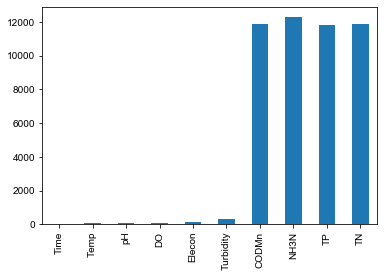

In [4]:
# Áº∫Â§±Êï∞ÊçÆÊü±Áä∂Âõæ
data_dawj[data_dawj.columns].isna().sum().plot(kind='bar')

In [50]:
# 4È°πÊåáÊ†áÂú®Â∞èÊó∂ÂàÜÈÖç‰∏äÁöÑÂàÜÂ∏É
dawj[['codmn', 'nh3n', 'tp', 'tn']].groupby(dawj['time'].dt.hour).count().T

NameError: name 'dawj' is not defined

### ÊµãËØïÊï∞ÊçÆ

In [7]:
# ÊµãËØïÊï∞ÊçÆ
test_dawj = read_data(test_dir, dawj_test)
test_wuys = read_data(test_dir, wuys_test)
test_yanjd = read_data(test_dir, yanjd_test)
# Â≠óÁ¨¶Â§ÑÁêÜ
test_dawj = transform_data(test_dawj)
test_wuys = transform_data(test_wuys)
test_yanjd = transform_data(test_yanjd)

In [8]:
test_4h_dawj = pd.concat([test_dawj[test_dawj['Time'].dt.hour==i] for i in range(0, 21 ,4)]).sort_index()
test_4h_wuys = pd.concat([test_wuys[test_wuys['Time'].dt.hour==i] for i in range(0, 21 ,4)]).sort_index()
test_4h_yanjd = pd.concat([test_yanjd[test_yanjd['Time'].dt.hour==i] for i in range(0, 21 ,4)]).sort_index()
# nan
test_4h_dawj = test_4h_dawj.replace([-999.0, 999.0], [np.nan, np.nan]).sort_index()
test_4h_wuys = test_4h_wuys.replace([-999.0, 999.0], [np.nan, np.nan]).sort_index()
test_4h_yanjd = test_4h_yanjd.replace([-999.0, 999.0], [np.nan, np.nan]).sort_index()

In [9]:
test_4h_dawj.shape, test_4h_wuys.shape, test_4h_yanjd.shape

((467, 10), (397, 10), (426, 10))

In [20]:
test_4h_dawj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 1 to 1866
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       467 non-null    datetime64[ns]
 1   Temp       467 non-null    float64       
 2   pH         467 non-null    float64       
 3   DO         467 non-null    float64       
 4   Elecon     467 non-null    float64       
 5   Turbidity  450 non-null    float64       
 6   CODMn      462 non-null    float64       
 7   NH3N       424 non-null    float64       
 8   TP         464 non-null    float64       
 9   TN         464 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 60.1 KB


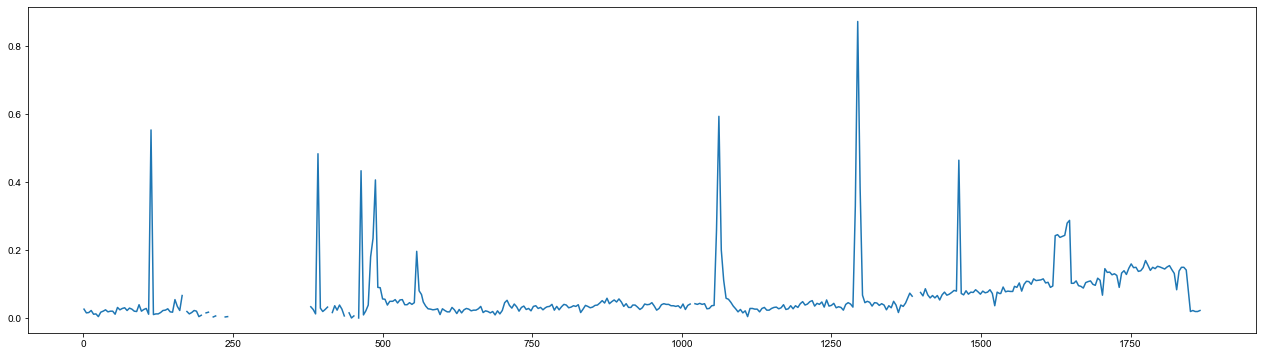

In [23]:
test_4h_dawj['NH3N'].plot(figsize=(22, 6))

In [11]:
test_4h_wuys.groupby(test_4h_wuys['Time'].dt.month).count().T

Time        5    6    7   8
Time       36  122  166  73
Temp       36  114  165  70
pH         36  114  165  70
DO         36  114  165  70
Elecon     36  114  165  70
Turbidity  36  114  165  70
CODMn      36  111  165  69
NH3N       21   15    1   0
TP         36  113  165  71
TN         36  110  165  71

In [8]:
# header=['Êó∂Èó¥', 'Ê∏©Â∫¶', 'pH', 'Ê∫∂Ëß£Ê∞ß', 'ÁîµÂØºÁéá', 'ÊµäÂ∫¶', 'È´òÈî∞ÈÖ∏ÁõêÊåáÊï∞', 'Ê∞®Ê∞Æ', 'ÊÄªÁ£∑', 'ÊÄªÊ∞Æ']
save(test_4h, 'Â§ß‰πåÊ±ü4Â∞èÊó∂È™åËØÅÂéüÂßãÊï∞ÊçÆ.xls')

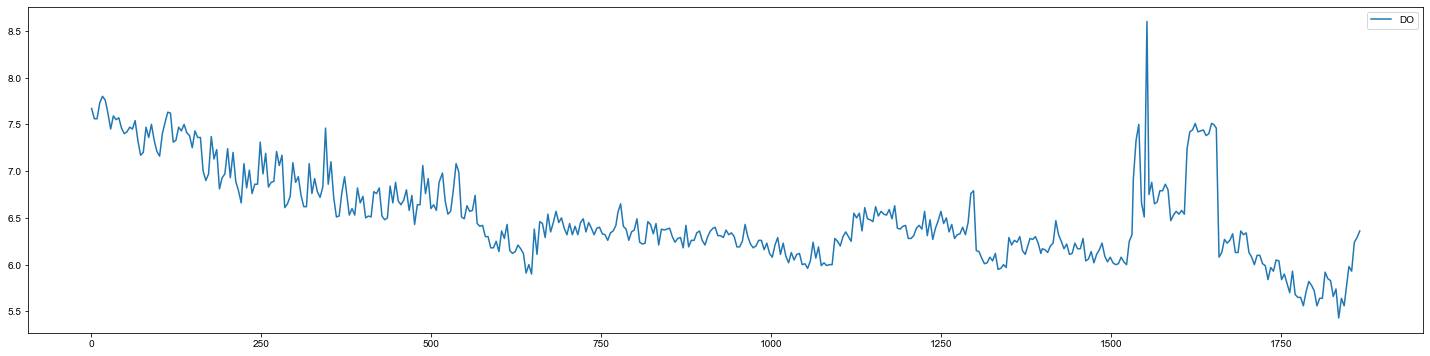

In [15]:
# ÂéüÂßãÊï∞ÊçÆ
test_4h[['DO']].plot(figsize=(25, 6))

In [10]:
test_4h.describe(percentiles=[.01, .02, .03, .05, .9, .95, .97, .99]).T

count        mean        std     min         1%         2%  \
Temp       467.0   19.946895   1.688578  16.800   16.80000   16.90000   
pH         467.0    7.564882   0.067859   7.400    7.44660    7.46000   
DO         467.0    6.510792   0.482931   5.430    5.64000    5.66640   
Elecon     467.0  441.369593  22.319467   0.400  421.56600  421.96400   
Turbidity  450.0   12.493333  18.526671   0.100    0.40000    0.60000   
CODMn      462.0    1.263009   1.121229   0.100    0.40440    0.52000   
NH3N       424.0    0.065969   0.083507   0.001    0.00423    0.00546   
TP         464.0    0.127351   0.085270   0.048    0.05100    0.05200   
TN         464.0    3.511918   0.209214   0.160    3.27630    3.28000   

                  3%        5%      50%       90%       95%        97%  \
Temp        16.90000   17.0300   20.300   22.0000   22.1000   22.20000   
pH           7.47000    7.4700    7.570    7.6400    7.6500    7.66020   
DO           5.73960    5.9030    6.390    7.3420    7.4670    7.52040   
Elecon     422.59600  422.9300  446.300  450.4000  451.2400  452.00200   
Turbidity    0.84700    1.5450    9.000   22.8600   30.1400   34.77100   
CODMn        0.53830    0.5905    1.070    1.6000    1.7400    2.40940   
NH3N         0.00838    0.0130    0.039    0.1400    0.1685    0.24462   
TP           0.05200    0.0540    0.091    0.2551    0.3271    0.34011   
TN           3.29000    3.3000    3.500    3.7170    3.7700    3.79000   

                 99%      max  
Temp        22.23400   22.600  
pH           7.71000    8.230  
DO           7.64360    8.600  
Elecon     452.83400  453.700  
Turbidity   83.73100  237.100  
CODMn       10.04000   10.060  
NH3N         0.45787    0.873  
TP           0.37859    0.876  
TN           3.82000    3.930

+ ‰∏äÈôê95%Ôºå‰∏ãÈôê5%ÂàÜ‰ΩçÊï∞ Ëá™Âä®ÂàíÂàÜ

In [63]:
test_4h_thd = test_4h[['Time', 'Temp', 'pH', 'DO', 'Elecon', 'Turbidity', 'CODMn', 'NH3N', 'TP', 'TN']]
for x in test_4h_thd.columns[1:]:
    test_4h_thd.loc[test_4h_thd[x]<test_4h_thd[x].quantile(.05), x] = np.nan
    test_4h_thd.loc[test_4h_thd[x]>test_4h_thd[x].quantile(.95), x] = np.nan
test_4h_thd = test_4h_thd.interpolate(method='linear').fillna(method='bfill')

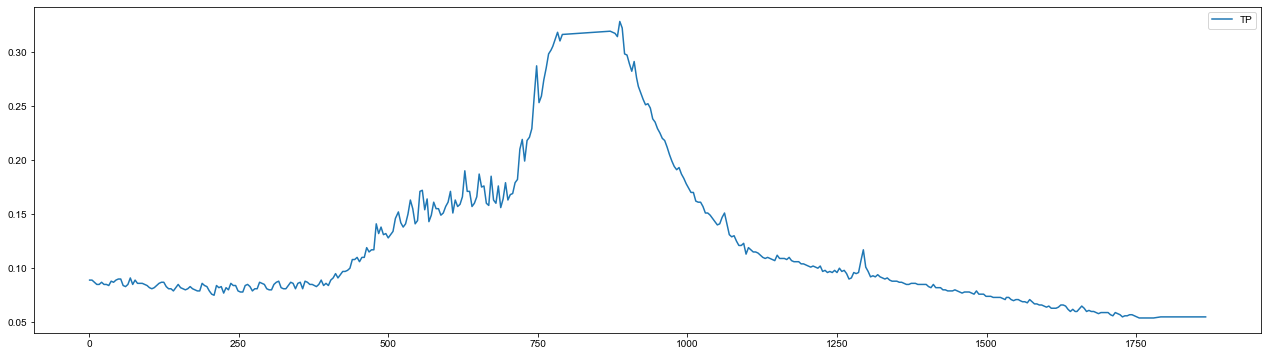

In [64]:
test_4h_thd[['TP']].plot(figsize=(22, 6))

+ ÊâãÂä®Á°ÆÂÆöÁªüËÆ°ÊåáÊ†á

In [22]:
# features
test_4h_feat = test_4h[['Time', 'Temp', 'pH', 'DO', 'Elecon', 'Turbidity']]
# ÂºÇÂ∏∏Êï∞ÊçÆ nan ÔºåÂêéÊúüÊï∞ÊçÆ interpolate & fill Â°´Ë°•
test_4h_feat.loc[test_4h_feat['Elecon']<test_4h_feat['Elecon'].quantile(.01), 'Elecon'] = np.nan
test_4h_feat.loc[test_4h_feat['pH']>test_4h_feat['pH'].quantile(.99), 'pH'] = np.nan
test_4h_feat.loc[test_4h_feat['DO']>test_4h_feat['DO'].quantile(.99), 'DO'] = np.nan
test_4h_feat.loc[test_4h_feat['Turbidity']>test_4h_feat['Turbidity'].quantile(.97), 'Turbidity'] = np.nan
test_4h_feat = test_4h_feat.interpolate(method='linear').fillna(method='bfill')
test_4h_feat.describe(percentiles=[.01, .02, .03, .05, .9, .95, .97, .98, .99]).T

count        mean       std     min        1%        2%        3%  \
Temp       467.0   19.946895  1.688578   16.80   16.8000   16.9000   16.9000   
pH         467.0    7.562527  0.058939    7.40    7.4466    7.4600    7.4700   
DO         467.0    6.505225  0.469816    5.43    5.6400    5.6664    5.7396   
Elecon     467.0  442.404497  8.707044  421.60  421.9000  422.3320  422.7000   
Turbidity  467.0    9.942184  7.152474    0.10    0.4000    0.6000    0.8000   

                5%     50%     90%     95%       97%       98%      99%  \
Temp        17.030   20.30   22.00   22.10   22.2000   22.2000   22.234   
pH           7.470    7.56    7.64    7.65    7.6600    7.6668    7.680   
DO           5.903    6.39    7.33    7.46    7.5102    7.5600    7.590   
Elecon     423.130  446.30  450.40  451.24  452.0020  452.6000  452.834   
Turbidity    1.500    8.50   21.14   24.77   27.6080   29.5720   31.644   

              max  
Temp        22.60  
pH           7.71  
DO           7.63  
Elecon     453.70  
Turbidity   34.40

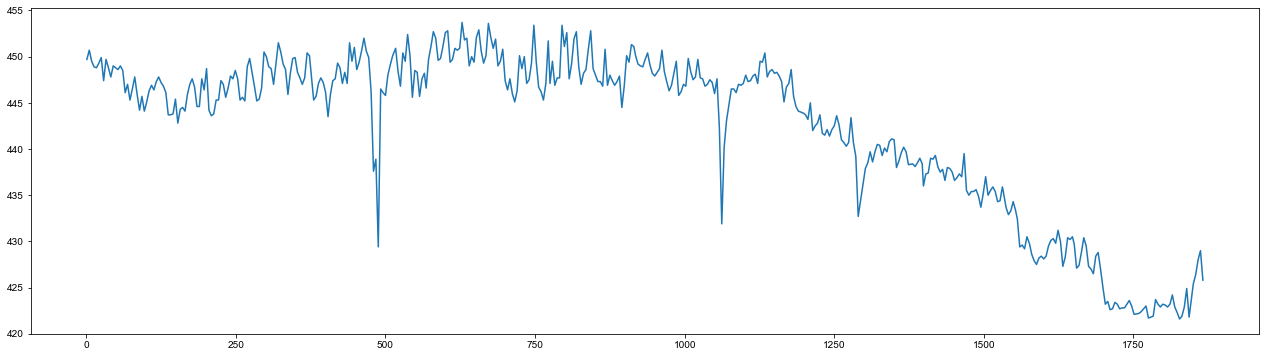

In [164]:
test_4h_feat['Elecon'].plot(figsize=(22, 6))

## Êï∞ÊçÆ ‰∫îÂ∏∏ -> ÂõõÈ°π Â°´Ë°•

#### Method1: ‰ªéÂéüÂßãÊñá‰ª∂ÊèêÂèñ4Â∞èÊó∂Èó¥ÈöîÊï∞ÊçÆ

In [6]:
# 4Â∞èÊó∂Èó¥ÈöîÊï∞ÊçÆ
data_4h = pd.concat([data_dawj[data_dawj['Time'].dt.hour==i] for i in [0, 4, 8, 12, 16, 20]]).sort_index()
data_4h

Time  Temp    pH    DO  Elecon  Turbidity  CODMn   NH3N  \
18    2018-06-06 12:00:00  19.6  5.73  4.81   449.2        NaN    NaN    NaN   
21    2018-06-06 20:00:00  19.6  5.73  4.96   449.8        NaN    NaN    NaN   
24    2018-06-07 04:00:00  19.6  5.80  5.03   450.3        NaN    NaN    NaN   
27    2018-06-07 12:00:00  19.9  5.83  5.09   449.3        NaN    NaN    NaN   
30    2018-06-07 20:00:00  19.7  5.86  5.18   448.1        NaN    NaN    NaN   
...                   ...   ...   ...   ...     ...        ...    ...    ...   
15898 2020-05-25 20:00:00  16.8  7.68  7.77   449.7        1.8   0.90  0.026   
15902 2020-05-26 00:00:00  16.8  7.68  7.67   449.7        0.9   1.12  0.027   
15906 2020-05-26 04:00:00  16.8  7.64  7.56   450.7        4.7   1.08  0.016   
15910 2020-05-26 08:00:00  16.8  7.64  7.56   449.5        7.4   1.08  0.017   
15914 2020-05-26 12:00:00  16.9  7.71  7.73   448.9       10.5   0.92  0.023   

          TP    TN  
18       NaN   NaN  
21       NaN   NaN  
24       NaN   NaN  
27       NaN   NaN  
30       NaN   NaN  
...      ...   ...  
15898  0.090  3.35  
15902  0.089  3.44  
15906  0.089  3.44  
15910  0.087  3.28  
15914  0.085  3.44  

[3999 rows x 10 columns]

In [15]:
# ÂÆåÊï¥Êó∂Èó¥ÊÆµÂÜÖ4Â∞èÊó∂È¢ëÁéáÁöÑÊï∞ÊçÆÊÄªÈáè
pd.date_range('2018-6-6 12', '2020-5-26 12', freq='4H').shape

(4321,)

In [16]:
pd.date_range(data_4h['Time'].values[0], data_4h['Time'].values[-1], freq='4H').shape

(4321,)

In [12]:
data_4h['Time'].values[0]

numpy.datetime64('2018-06-06T12:00:00.000000000')

In [40]:
# ‰øùÂ≠ò data_4h ÂéüÂßãÊï∞ÊçÆ, 
# 3999Êù° Êú™Ë°•ÂÖÖ Êï∞ÊçÆ
# header=['Êó∂Èó¥', 'Ê∏©Â∫¶', 'pH', 'Ê∫∂Ëß£Ê∞ß', 'ÁîµÂØºÁéá', 'ÊµäÂ∫¶', 'È´òÈî∞ÈÖ∏ÁõêÊåáÊï∞', 'Ê∞®Ê∞Æ', 'ÊÄªÁ£∑', 'ÊÄªÊ∞Æ']
save(data_4h, 'Â§ß‰πåÊ±ü4Â∞èÊó∂ÂéüÂßãÊï∞ÊçÆ.xls')

### ÂØπÂéüÂßã4Â∞èÊó∂Êï∞ÊçÆËøõË°åÊó∂Èó¥Â°´Ë°•Êâ©Â±ï

In [13]:
data_4h.groupby(data_4h['Time'].dt.hour).count()

Time  Temp   pH   DO  Elecon  Turbidity  CODMn  NH3N   TP   TN
Time                                                                
0      670   666  666  666     665        650    661   589  667  662
4      671   670  670  670     667        650    656   579  661  657
8      652   650  650  650     647        635    638   583  644  641
12     667   662  662  662     660        645    646   581  655  649
16     669   664  664  664     662        651    653   589  661  658
20     670   667  666  667     665        651    657   600  659  657

In [16]:
data_dwj['Time']

1       2018-05-30 14:00:00
2       2018-05-30 18:00:00
3       2018-05-30 19:00:00
4       2018-05-30 21:00:00
5       2018-05-31 19:00:00
                ...        
15913   2020-05-26 11:00:00
15914   2020-05-26 12:00:00
15915   2020-05-26 13:00:00
15916   2020-05-26 14:00:00
15917   2020-05-26 15:00:00
Name: Time, Length: 15917, dtype: datetime64[ns]

In [17]:
data_4h

Time  Temp    pH    DO  Elecon  Turbidity  CODMn   NH3N  \
18    2018-06-06 12:00:00  19.6  5.73  4.81   449.2        NaN    NaN    NaN   
21    2018-06-06 20:00:00  19.6  5.73  4.96   449.8        NaN    NaN    NaN   
24    2018-06-07 04:00:00  19.6  5.80  5.03   450.3        NaN    NaN    NaN   
27    2018-06-07 12:00:00  19.9  5.83  5.09   449.3        NaN    NaN    NaN   
30    2018-06-07 20:00:00  19.7  5.86  5.18   448.1        NaN    NaN    NaN   
...                   ...   ...   ...   ...     ...        ...    ...    ...   
15898 2020-05-25 20:00:00  16.8  7.68  7.77   449.7        1.8   0.90  0.026   
15902 2020-05-26 00:00:00  16.8  7.68  7.67   449.7        0.9   1.12  0.027   
15906 2020-05-26 04:00:00  16.8  7.64  7.56   450.7        4.7   1.08  0.016   
15910 2020-05-26 08:00:00  16.8  7.64  7.56   449.5        7.4   1.08  0.017   
15914 2020-05-26 12:00:00  16.9  7.71  7.73   448.9       10.5   0.92  0.023   

          TP    TN  
18       NaN   NaN  
21       NaN   NaN  
24       NaN   NaN  
27       NaN   NaN  
30       NaN   NaN  
...      ...   ...  
15898  0.090  3.35  
15902  0.089  3.44  
15906  0.089  3.44  
15910  0.087  3.28  
15914  0.085  3.44  

[3999 rows x 10 columns]

In [18]:
data_4h.describe(percentiles=[.01, .02, .03, .05, .9, .95, .97, .99]).T

count        mean        std     min        1%       2%       3%  \
Temp       3979.0   18.390048   3.528284  12.800  13.30000   13.400   13.500   
pH         3978.0    7.647011   0.243514   5.730   7.01240    7.250    7.300   
DO         3979.0    7.469952   1.247344   4.490   4.85000    5.160    5.300   
Elecon     3966.0  436.616692  57.635617   0.020   0.30000  407.690  411.195   
Turbidity  3882.0    9.269650  59.298614   0.004   0.10000    0.100    0.200   
CODMn      3911.0    1.101374   1.374047   0.003   0.16000    0.342    0.450   
NH3N       3521.0    0.104353   0.536083   0.001   0.00100    0.002    0.003   
TP         3947.0    0.177125   0.126353   0.001   0.05846    0.062    0.065   
TN         3924.0    3.641802   2.053715   0.010   2.63150    3.120    3.160   

                5%      50%       90%      95%      97%       99%       max  
Temp        13.700   18.000   22.8000   23.400   23.700   26.1220    30.500  
pH           7.340    7.635    7.9300    8.020    8.080    8.2723     9.160  
DO           5.420    7.510    9.0820    9.420    9.550    9.8622    10.110  
Elecon     417.000  440.950  465.4000  466.800  467.900  470.0350   474.000  
Turbidity    0.200    0.600    8.6000   22.295   53.228  215.8040  1536.500  
CODMn        0.560    0.880    1.2100    1.375    2.595    8.7030    16.110  
NH3N         0.004    0.022    0.0520    0.114    0.370    3.9730     5.654  
TP           0.068    0.141    0.3294    0.376    0.418    0.7780     1.160  
TN           3.230    3.540    3.7600    3.840    3.910    4.5877    72.880

In [20]:
# ÂºÇÂ∏∏ËµãÂÄºnan
data_4h.loc[data_4h['Elecon']<data_4h['Elecon'].quantile(.02), 'Elecon'] = np.nan
data_4h.loc[data_4h['Turbidity']>data_4h['Turbidity'].quantile(.97), 'Turbidity'] = np.nan
data_4h.loc[data_4h['TN']<data_4h['TN'].quantile(.01), 'TN'] = np.nan
data_4h.loc[data_4h['TN']>data_4h['TN'].quantile(.99), 'TN'] = np.nan
data_4h.describe(percentiles=[.01, .02, .03, .05, .9, .95, .97, .99]).T

count        mean        std      min         1%       2%  \
Temp       3979.0   18.390048   3.528284   12.800   13.30000   13.400   
pH         3978.0    7.647011   0.243514    5.730    7.01240    7.250   
DO         3979.0    7.469952   1.247344    4.490    4.85000    5.160   
Elecon     3886.0  443.903268  15.210553  407.900  411.18500  414.470   
Turbidity  3765.0    2.415055   5.694862    0.004    0.10000    0.100   
CODMn      3911.0    1.101374   1.374047    0.003    0.16000    0.342   
NH3N       3521.0    0.104353   0.536083    0.001    0.00100    0.002   
TP         3947.0    0.177125   0.126353    0.001    0.05846    0.062   
TN         3845.0    3.545451   0.179456    2.670    3.12000    3.160   

                3%       5%      50%       90%      95%      97%       99%  \
Temp        13.500   13.700   18.000   22.8000   23.400   23.700   26.1220   
pH           7.300    7.340    7.635    7.9300    8.020    8.080    8.2723   
DO           5.300    5.420    7.510    9.0820    9.420    9.550    9.8622   
Elecon     416.810  420.300  441.500  465.4000  466.875  467.900  470.1000   
Turbidity    0.200    0.200    0.600    6.5000   11.700   19.508   30.1080   
CODMn        0.450    0.560    0.880    1.2100    1.375    2.595    8.7030   
NH3N         0.003    0.004    0.022    0.0520    0.114    0.370    3.9730   
TP           0.065    0.068    0.141    0.3294    0.376    0.418    0.7780   
TN           3.200    3.250    3.540    3.7500    3.820    3.870    4.0256   

               max  
Temp        30.500  
pH           9.160  
DO          10.110  
Elecon     474.000  
Turbidity   53.000  
CODMn       16.110  
NH3N         5.654  
TP           1.160  
TN           4.590

In [21]:
data_4h

Time  Temp    pH    DO  Elecon  Turbidity  CODMn   NH3N  \
18    2018-06-06 12:00:00  19.6  5.73  4.81   449.2        NaN    NaN    NaN   
21    2018-06-06 20:00:00  19.6  5.73  4.96   449.8        NaN    NaN    NaN   
24    2018-06-07 04:00:00  19.6  5.80  5.03   450.3        NaN    NaN    NaN   
27    2018-06-07 12:00:00  19.9  5.83  5.09   449.3        NaN    NaN    NaN   
30    2018-06-07 20:00:00  19.7  5.86  5.18   448.1        NaN    NaN    NaN   
...                   ...   ...   ...   ...     ...        ...    ...    ...   
15898 2020-05-25 20:00:00  16.8  7.68  7.77   449.7        1.8   0.90  0.026   
15902 2020-05-26 00:00:00  16.8  7.68  7.67   449.7        0.9   1.12  0.027   
15906 2020-05-26 04:00:00  16.8  7.64  7.56   450.7        4.7   1.08  0.016   
15910 2020-05-26 08:00:00  16.8  7.64  7.56   449.5        7.4   1.08  0.017   
15914 2020-05-26 12:00:00  16.9  7.71  7.73   448.9       10.5   0.92  0.023   

          TP    TN  
18       NaN   NaN  
21       NaN   NaN  
24       NaN   NaN  
27       NaN   NaN  
30       NaN   NaN  
...      ...   ...  
15898  0.090  3.35  
15902  0.089  3.44  
15906  0.089  3.44  
15910  0.087  3.28  
15914  0.085  3.44  

[3999 rows x 10 columns]

In [22]:
# ÊûÑÂª∫ÂÆåÊï¥Â∫èÂàóÊï∞ÊçÆ
data_4h_expand1 = pd.DataFrame(columns=data_4h.columns) 
data_4h_expand1['Time'] = pd.date_range('2018-6-6 12', '2020-5-26 12', freq='4H')
data_4h_expand1

Time Temp   pH   DO Elecon Turbidity CODMn NH3N   TP   TN
0    2018-06-06 12:00:00  NaN  NaN  NaN    NaN       NaN   NaN  NaN  NaN  NaN
1    2018-06-06 16:00:00  NaN  NaN  NaN    NaN       NaN   NaN  NaN  NaN  NaN
2    2018-06-06 20:00:00  NaN  NaN  NaN    NaN       NaN   NaN  NaN  NaN  NaN
3    2018-06-07 00:00:00  NaN  NaN  NaN    NaN       NaN   NaN  NaN  NaN  NaN
4    2018-06-07 04:00:00  NaN  NaN  NaN    NaN       NaN   NaN  NaN  NaN  NaN
...                  ...  ...  ...  ...    ...       ...   ...  ...  ...  ...
4316 2020-05-25 20:00:00  NaN  NaN  NaN    NaN       NaN   NaN  NaN  NaN  NaN
4317 2020-05-26 00:00:00  NaN  NaN  NaN    NaN       NaN   NaN  NaN  NaN  NaN
4318 2020-05-26 04:00:00  NaN  NaN  NaN    NaN       NaN   NaN  NaN  NaN  NaN
4319 2020-05-26 08:00:00  NaN  NaN  NaN    NaN       NaN   NaN  NaN  NaN  NaN
4320 2020-05-26 12:00:00  NaN  NaN  NaN    NaN       NaN   NaN  NaN  NaN  NaN

[4321 rows x 10 columns]

In [23]:
data_4h[data_4h['Time']=='2018-06-06 12:00:00']

Time  Temp    pH    DO  Elecon  Turbidity  CODMn  NH3N  TP  \
18 2018-06-06 12:00:00  19.6  5.73  4.81   449.2        NaN    NaN   NaN NaN   

    TN  
18 NaN

In [24]:
data_4h_full1 = data_4h_expand1.merge(data_4h, how='outer').groupby('Time').max()
data_4h_full1

Temp    pH    DO  Elecon  Turbidity  CODMn   NH3N     TP  \
Time                                                                            
2018-06-06 12:00:00  19.6  5.73  4.81   449.2        NaN    NaN    NaN    NaN   
2018-06-06 16:00:00   NaN   NaN   NaN     NaN        NaN    NaN    NaN    NaN   
2018-06-06 20:00:00  19.6  5.73  4.96   449.8        NaN    NaN    NaN    NaN   
2018-06-07 00:00:00   NaN   NaN   NaN     NaN        NaN    NaN    NaN    NaN   
2018-06-07 04:00:00  19.6  5.80  5.03   450.3        NaN    NaN    NaN    NaN   
...                   ...   ...   ...     ...        ...    ...    ...    ...   
2020-05-25 20:00:00  16.8  7.68  7.77   449.7        1.8   0.90  0.026  0.090   
2020-05-26 00:00:00  16.8  7.68  7.67   449.7        0.9   1.12  0.027  0.089   
2020-05-26 04:00:00  16.8  7.64  7.56   450.7        4.7   1.08  0.016  0.089   
2020-05-26 08:00:00  16.8  7.64  7.56   449.5        7.4   1.08  0.017  0.087   
2020-05-26 12:00:00  16.9  7.71  7.73   448.9       10.5   0.92  0.023  0.085   

                       TN  
Time                       
2018-06-06 12:00:00   NaN  
2018-06-06 16:00:00   NaN  
2018-06-06 20:00:00   NaN  
2018-06-07 00:00:00   NaN  
2018-06-07 04:00:00   NaN  
...                   ...  
2020-05-25 20:00:00  3.35  
2020-05-26 00:00:00  3.44  
2020-05-26 04:00:00  3.44  
2020-05-26 08:00:00  3.28  
2020-05-26 12:00:00  3.44  

[4321 rows x 9 columns]

In [26]:
data_4h_full1.interpolate(method='linear').fillna(method='bfill').reset_index('Time')

Time  Temp     pH     DO  Elecon  Turbidity  CODMn   NH3N  \
0    2018-06-06 12:00:00  19.6  5.730  4.810  449.20       46.7   1.40  0.077   
1    2018-06-06 16:00:00  19.6  5.730  4.885  449.50       46.7   1.40  0.077   
2    2018-06-06 20:00:00  19.6  5.730  4.960  449.80       46.7   1.40  0.077   
3    2018-06-07 00:00:00  19.6  5.765  4.995  450.05       46.7   1.40  0.077   
4    2018-06-07 04:00:00  19.6  5.800  5.030  450.30       46.7   1.40  0.077   
...                  ...   ...    ...    ...     ...        ...    ...    ...   
4316 2020-05-25 20:00:00  16.8  7.680  7.770  449.70        1.8   0.90  0.026   
4317 2020-05-26 00:00:00  16.8  7.680  7.670  449.70        0.9   1.12  0.027   
4318 2020-05-26 04:00:00  16.8  7.640  7.560  450.70        4.7   1.08  0.016   
4319 2020-05-26 08:00:00  16.8  7.640  7.560  449.50        7.4   1.08  0.017   
4320 2020-05-26 12:00:00  16.9  7.710  7.730  448.90       10.5   0.92  0.023   

         TP    TN  
0     0.092  3.30  
1     0.092  3.30  
2     0.092  3.30  
3     0.092  3.30  
4     0.092  3.30  
...     ...   ...  
4316  0.090  3.35  
4317  0.089  3.44  
4318  0.089  3.44  
4319  0.087  3.28  
4320  0.085  3.44  

[4321 rows x 10 columns]

```
def save(data, name=None):
    data.to_excel(name, index=False, 
        header=['Êó∂Èó¥', 'Ê∏©Â∫¶', 'pH', 'Ê∫∂Ëß£Ê∞ß', 'ÁîµÂØºÁéá', 'ÊµäÂ∫¶', 'È´òÈî∞ÈÖ∏ÁõêÊåáÊï∞', 'Ê∞®Ê∞Æ', 'ÊÄªÁ£∑', 'ÊÄªÊ∞Æ'],
        encoding='utf-8')
```

In [27]:
save(
    data_4h_full1.interpolate(method='linear').fillna(method='bfill').reset_index('Time'), 
    'Â§ß‰πåÊ±ü4Â∞èÊó∂ÂéüÂßãÊï∞ÊçÆ-Êó∂Èó¥Êâ©Â±ï.xls')

---

# Á≠õÈÄâÊï∞ÊçÆËøõË°åÊ®°ÂûãËÆ≠ÁªÉ

In [20]:
# ÊûÑÂª∫ËÆ≠ÁªÉÈõÜ
data_base = data_dwj.dropna()
data_base.describe(percentiles=[.01, .02, .03, .05, .9, .95, .97, .99]).T

count        mean        std     min      1%       2%       3%  \
Temp       3421.0   18.178281   3.458600  13.000  13.300   13.400   13.500   
pH         3421.0    7.670991   0.221081   6.080   7.210    7.274    7.310   
DO         3421.0    7.589716   1.206035   4.490   5.082    5.338    5.420   
Elecon     3421.0  438.276995  52.023275   0.020   0.400  409.400  411.520   
Turbidity  3421.0    7.104754  57.719891   0.004   0.100    0.100    0.200   
CODMn      3421.0    1.035341   1.129177   0.003   0.180    0.320    0.450   
NH3N       3421.0    0.076167   0.420166   0.001   0.001    0.002    0.003   
TP         3421.0    0.164383   0.108800   0.001   0.059    0.062    0.064   
TN         3421.0    3.578138   1.457689   0.010   2.582    2.830    3.120   

                5%      50%      90%      95%       97%       99%       max  
Temp        13.700   17.300   22.700   23.200   23.6000   24.2800    30.500  
pH           7.380    7.650    7.970    8.030    8.0800    8.2600     9.160  
DO           5.520    7.600    9.140    9.460    9.5800    9.8700    10.110  
Elecon     416.600  442.000  465.500  466.800  467.7000  469.7000   472.800  
Turbidity    0.200    0.600    5.800   13.500   27.2800   87.2800  1536.500  
CODMn        0.560    0.880    1.190    1.330    1.4700    7.7180    16.110  
NH3N         0.004    0.022    0.050    0.079    0.1492    1.7680     5.654  
TP           0.068    0.137    0.311    0.370    0.3910    0.5552     1.015  
TN           3.200    3.540    3.760    3.830    3.8800    4.2060    62.980

In [21]:
data_base.sample()

Time  Temp    pH    DO  Elecon  Turbidity  CODMn   NH3N     TP  \
9996 2019-09-20  22.8  7.52  5.37   436.1        0.3    0.8  0.032  0.062   

        TN  
9996  3.39

In [22]:
data_filter = data_base[['Time', 'Temp', 'pH', 'DO', 'Elecon', 'Turbidity', 'CODMn', 'NH3N', 'TP', 'TN']]
for x in data_filter.columns[1:]:
    data_filter.loc[data_filter[x]<data_filter[x].quantile(.05), x] = np.nan
    data_filter.loc[data_filter[x]>data_filter[x].quantile(.95), x] = np.nan
data_filter = data_filter.interpolate(method='linear').fillna(method='bfill')

In [23]:
data_filter.describe(percentiles=[.01,.02,.03,.05,.9,.95,.97,.99]).T

count        mean        std      min          1%          2%  \
Temp       3421.0   18.133996   3.300235   13.700   13.700000   13.700000   
pH         3421.0    7.671767   0.174508    7.380    7.383467    7.392091   
DO         3421.0    7.600247   1.132509    5.520    5.550000    5.577000   
Elecon     3421.0  444.109222  14.986757  416.600  416.694375  417.883000   
Turbidity  3421.0    1.460421   2.363184    0.200    0.200000    0.200000   
CODMn      3421.0    0.899187   0.178007    0.560    0.580000    0.595857   
NH3N       3421.0    0.025027   0.015007    0.004    0.004000    0.005000   
TP         3421.0    0.154721   0.076204    0.068    0.068000    0.068000   
TN         3421.0    3.536336   0.144900    3.200    3.220000    3.232500   

                   3%          5%      50%        90%      95%         97%  \
Temp        13.738545   13.833333   17.300   22.70000   23.090   23.300000   
pH           7.400000    7.415357    7.650    7.94000    8.000    8.020000   
DO           5.590000    5.627500    7.600    9.10000    9.380    9.425900   
Elecon     418.900000  420.800000  442.400  465.40000  466.200  466.532424   
Turbidity    0.200000    0.200000    0.600    4.40000    6.908    8.600000   
CODMn        0.610000    0.630000    0.880    1.16000    1.230    1.266667   
NH3N         0.005000    0.006000    0.022    0.04500    0.054    0.061250   
TP           0.068630    0.070000    0.136    0.28313    0.340    0.363400   
TN           3.250000    3.276667    3.540    3.73000    3.780    3.800000   

                  99%      max  
Temp        23.300000   23.300  
pH           8.040000    8.040  
DO           9.460000    9.480  
Elecon     466.800000  466.900  
Turbidity   11.800000   14.400  
CODMn        1.320000    1.340  
NH3N         0.078422    0.079  
TP           0.370000    0.372  
TN           3.820000    3.830

In [24]:
# ÂâîÈô§ÊûÅÈ´òÂÄº  ÊåáÊ†áÁôæÂàÜ‰ΩçÁâπÂÆö
data_filter = data_base.loc[
    (data_base['pH']<=data_base['pH'].quantile(.99)) &
    (data_base['TN']<=data_base['TN'].quantile(.99)) &
    (data_base['TN']>=data_base['TN'].quantile(.01)) &
    (data_base['TP']<=data_base['TP'].quantile(.99)) &
    (data_base['Elecon']>=data_base['Elecon'].quantile(.02)) &
    (data_base['Turbidity']<=data_base['Turbidity'].quantile(.97)) &
    (data_base['CODMn']<=data_base['CODMn'].quantile(.98)) &
    (data_base['NH3N']<=data_base['NH3N'].quantile(.98))
]
data_filter.describe(percentiles=[.01,.02,.03,.05,.9,.95,.97,.99]).T

count        mean        std      min        1%        2%  \
Temp       3162.0   18.006641   3.311453   13.000   13.3000   13.4000   
pH         3162.0    7.670354   0.193082    6.810    7.2461    7.3100   
DO         3162.0    7.580721   1.179752    4.490    5.3300    5.4200   
Elecon     3162.0  444.095035  15.484508  409.400  411.3000  414.3220   
Turbidity  3162.0    1.450133   2.976955    0.009    0.1000    0.1000   
CODMn      3162.0    0.878635   0.226916    0.003    0.2061    0.3322   
NH3N       3162.0    0.025724   0.023362    0.001    0.0010    0.0020   
TP         3162.0    0.157179   0.084785    0.002    0.0590    0.0620   
TN         3162.0    3.530560   0.182679    2.590    2.8300    3.1300   

                3%       5%      50%       90%        95%      97%        99%  \
Temp        13.500   13.700   17.100   22.7000   22.90000   23.400   23.80000   
pH           7.340    7.390    7.650    7.9500    8.01000    8.040    8.10390   
DO           5.460    5.550    7.570    9.1090    9.47000    9.580    9.87000   
Elecon     416.483  419.905  442.650  465.6000  466.90000  467.717  469.73900   
Turbidity    0.100    0.200    0.500    3.6000    6.89500    9.417   17.13900   
CODMn        0.450    0.550    0.870    1.1400    1.22000    1.300    1.42780   
NH3N         0.003    0.004    0.021    0.0460    0.05500    0.066    0.09600   
TP           0.064    0.068    0.136    0.2869    0.36395    0.379    0.44178   
TN           3.170    3.230    3.540    3.7490    3.80000    3.840    3.91000   

               max  
Temp        24.600  
pH           8.260  
DO          10.110  
Elecon     472.800  
Turbidity   27.200  
CODMn        2.830  
NH3N         0.375  
TP           0.524  
TN           4.190

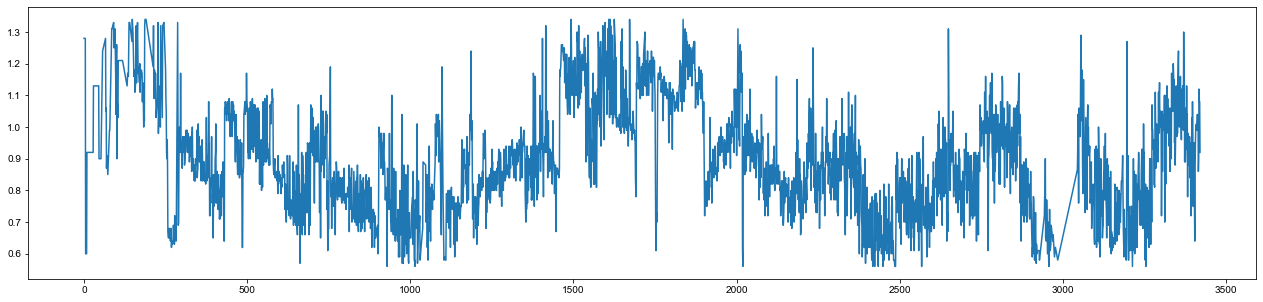

In [24]:
data_filter.reset_index()['CODMn'].plot(figsize=(22, 5))

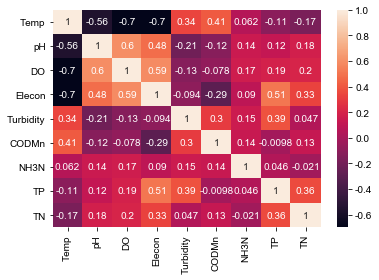

In [25]:
# ÂèòÈáèÁõ∏ÂÖ≥ÊÄßÁÉ≠ÂäõÂõæ  data_filter
sns.heatmap(data_filter[data_filter.columns[1:]].corr(), annot=True)

In [20]:
# ÊåâÁÖßÂπ¥Â∫¶„ÄÅÊúà‰ªΩËøõË°åÁº∫Â§±ÂØπÊØî
data_base.groupby([data_base['Time'].dt.year, data_base['Time'].dt.month]).count().T

Time      2018                             2019                                \
Time        6   7    8    9   10   11   12   1    2    3    4    5    6    7    
Time        53  29  107  102  71  140  147  174  143  186  166  176  179  149   
Temp        53  29  107  102  71  140  147  174  143  186  166  176  179  149   
pH          53  29  107  102  71  140  147  174  143  186  166  176  179  149   
DO          53  29  107  102  71  140  147  174  143  186  166  176  179  149   
Elecon      53  29  107  102  71  140  147  174  143  186  166  176  179  149   
Turbidity   53  29  107  102  71  140  147  174  143  186  166  176  179  149   
CODMn       53  29  107  102  71  140  147  174  143  186  166  176  179  149   
NH3N        53  29  107  102  71  140  147  174  143  186  166  176  179  149   
TP          53  29  107  102  71  140  147  174  143  186  166  176  179  149   
TN          53  29  107  102  71  140  147  174  143  186  166  176  179  149   

Time                               2020                      
Time        8    9    10   11   12   1    2    3    4    5   
Time       167  173  169  178  138  172  133  159  158  152  
Temp       167  173  169  178  138  172  133  159  158  152  
pH         167  173  169  178  138  172  133  159  158  152  
DO         167  173  169  178  138  172  133  159  158  152  
Elecon     167  173  169  178  138  172  133  159  158  152  
Turbidity  167  173  169  178  138  172  133  159  158  152  
CODMn      167  173  169  178  138  172  133  159  158  152  
NH3N       167  173  169  178  138  172  133  159  158  152  
TP         167  173  169  178  138  172  133  159  158  152  
TN         167  173  169  178  138  172  133  159  158  152

In [13]:
# ÁîªÂ∫èÂàóÂõæ
def show_index(data: pd.DataFrame, index: str, low: float=None, high: float=None):
    ''' Ê†πÊçÆÊåáÂÆö Êï∞ÊçÆÈõÜ Âíå ÁâπÂæÅÔºåÂ±ïÁ§∫Êó∂Èó¥Â∫èÂàóÂõæÂÉè '''
    fig, ax = plt.subplots(figsize=(23, 6))
    # line
    ax.plot(data['Time'], data[index], color='b', label='Org_{}'.format(index))
    ax.set_xlabel('Êó∂Èó¥', fontsize=15)
    ax.set_ylabel(index, fontsize=15)
    # ticks
    ax.xaxis.set_tick_params(rotation=50, labelsize=12)
    xstart, xend = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(xstart, xend, 20))
    ax.yaxis.set_tick_params(labelsize=14)
    # title
    ax.set_title('Êó∂Èó¥Â∫èÂàó',fontsize=18)
    # legennd
    ax.legend(fontsize=15, loc='upper left')
    # filter data
    if low is not None and high is not None:
        ax1 = ax.twinx()
        data_tmp = deepcopy(data)
        # restrict data
        data_tmp.loc[data_tmp[index]<low, index] = np.nan
        data_tmp.loc[data_tmp[index]>high, index] = np.nan
        # line
        ax1.plot(data_tmp['Time'], data_tmp[index], color='g', label='Adj_{}'.format(index))
        ax1.set_ylabel(index, fontsize=15)
        ax.xaxis.set_ticks(np.arange(xstart, xend, 20))
        ax1.legend(fontsize=15, loc='upper right')

    plt.show()

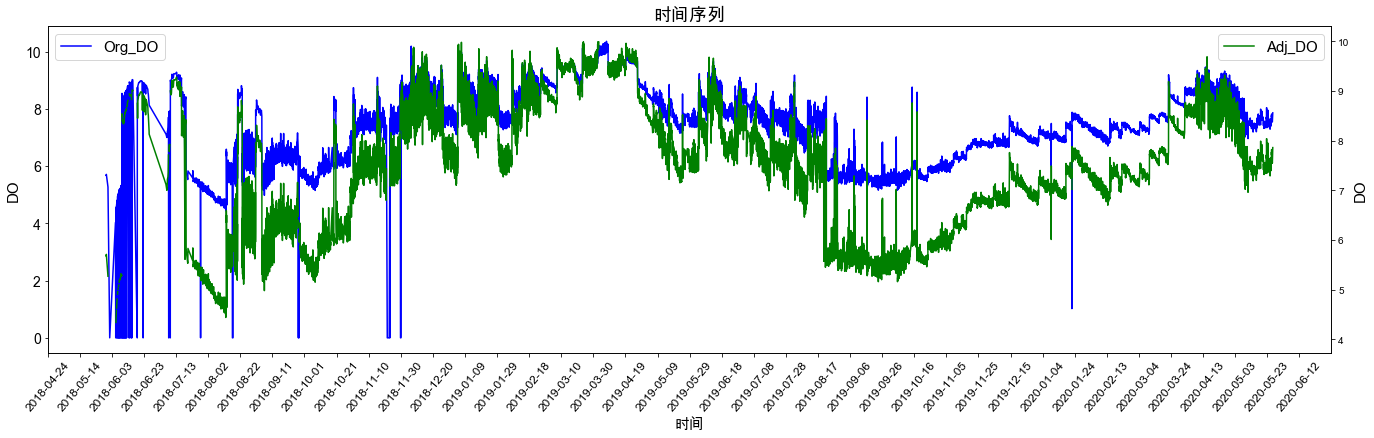

In [48]:
show_index(data_dwj, '', 4.0, 10.0)

## ÂΩí‰∏ÄÂåñ & Ê†áÂáÜÂåñ

#### ÂÖàÂàíÂàÜËÆ≠ÁªÉ„ÄÅÈ™åËØÅÈõÜÔºåÂÜçÂà©Áî®ËÆ≠ÁªÉÈõÜÁöÑÁâπÂæÅtransformÈ™åËØÅÈõÜ

In [26]:
# ÈÄâÊã©ÁâπÂæÅ & ÊãüÂêàÁõÆÊ†á
test_tn = data_filter[['Temp', 'pH', 'DO', 'Elecon', 'Turbidity', 'TN']]       # TN
test_tp = data_filter[['Temp', 'pH', 'DO', 'Elecon', 'Turbidity', 'TP']]       # TP 
test_nh3n = data_filter[['Temp', 'pH', 'DO', 'Elecon', 'Turbidity', 'NH3N']]   # NH3N
test_codmn = data_filter[['Temp', 'pH', 'DO', 'Elecon', 'Turbidity', 'CODMn']] # CODMn

### Á∫øÊÄßÂÖ≥Á≥ª‰∏ÄËà¨
---
### Â∞ùËØï‰∏Ä‰∫õÈùûÁ∫øÊÄßÁöÑÊ®°ÂûãÔºåÊàñËÄÖÈúÄË¶ÅÊñ∞ÁöÑÁâπÂæÅÔºà‰∫§ÂèâÁâπÂæÅÔºâÔºåÊü•ÁúãÊãüÂêàÊïàÊûú

## Â∏∏ËßÑÁªèÈ™åÊåáÊ†á

+ Time
+ Temp  ÈÄÇÂêàÂΩìÂú∞Âπ¥Â∫¶Âπ≥Âùá
+ pH    6~9 , 5~10
+ DO    > 0, ÂÄºË∂äÈ´òÊÑàÂ•ΩÔºåË°®Á§∫Ê∞¥‰∏≠Ê∞ßÊ∞îË∂äË∂≥
+ Elecon    ÁªüËÆ°ÊåáÊ†á
+ Turbidity ÁªüËÆ°ÊåáÊ†á
+ CODMn     0ÔΩû15„ÄÅ20„ÄÅ30
+ NH3N      0ÔΩû2„ÄÅ10   ‰∏çËÉΩÂ§ß‰∫éTN
+ TP        0ÔΩû7.64
+ TN        0ÔΩû100
---

+ TN 

In [27]:
test_tn.describe(percentiles=[.01,.02,.03,.05,.9,.95,.97,.99]).T

count        mean        std     min          1%          2%  \
Temp       3421.0   18.133996   3.300235   13.70   13.700000   13.700000   
pH         3421.0    7.671767   0.174508    7.38    7.383467    7.392091   
DO         3421.0    7.600247   1.132509    5.52    5.550000    5.577000   
Elecon     3421.0  444.109222  14.986757  416.60  416.694375  417.883000   
Turbidity  3421.0    1.460421   2.363184    0.20    0.200000    0.200000   
TN         3421.0    3.536336   0.144900    3.20    3.220000    3.232500   

                   3%          5%     50%     90%      95%         97%  \
Temp        13.738545   13.833333   17.30   22.70   23.090   23.300000   
pH           7.400000    7.415357    7.65    7.94    8.000    8.020000   
DO           5.590000    5.627500    7.60    9.10    9.380    9.425900   
Elecon     418.900000  420.800000  442.40  465.40  466.200  466.532424   
Turbidity    0.200000    0.200000    0.60    4.40    6.908    8.600000   
TN           3.250000    3.276667    3.54    3.73    3.780    3.800000   

              99%     max  
Temp        23.30   23.30  
pH           8.04    8.04  
DO           9.46    9.48  
Elecon     466.80  466.90  
Turbidity   11.80   14.40  
TN           3.82    3.83

+ TP

In [28]:
test_tp.describe(percentiles=[.01,.02,.03,.05,.9,.95,.97,.99]).T

count        mean        std      min          1%          2%  \
Temp       3421.0   18.133996   3.300235   13.700   13.700000   13.700000   
pH         3421.0    7.671767   0.174508    7.380    7.383467    7.392091   
DO         3421.0    7.600247   1.132509    5.520    5.550000    5.577000   
Elecon     3421.0  444.109222  14.986757  416.600  416.694375  417.883000   
Turbidity  3421.0    1.460421   2.363184    0.200    0.200000    0.200000   
TP         3421.0    0.154721   0.076204    0.068    0.068000    0.068000   

                   3%          5%      50%        90%      95%         97%  \
Temp        13.738545   13.833333   17.300   22.70000   23.090   23.300000   
pH           7.400000    7.415357    7.650    7.94000    8.000    8.020000   
DO           5.590000    5.627500    7.600    9.10000    9.380    9.425900   
Elecon     418.900000  420.800000  442.400  465.40000  466.200  466.532424   
Turbidity    0.200000    0.200000    0.600    4.40000    6.908    8.600000   
TP           0.068630    0.070000    0.136    0.28313    0.340    0.363400   

              99%      max  
Temp        23.30   23.300  
pH           8.04    8.040  
DO           9.46    9.480  
Elecon     466.80  466.900  
Turbidity   11.80   14.400  
TP           0.37    0.372

```
Â¶ÇÊûúÂêéÁª≠ËøõË°åÂΩí‰∏ÄÂåñ&Ê†áÂáÜÂåñÔºåÂÖ∂Êâ©Â§ßÊïàÊûúÂùáË¢´Ê∂àÈô§ÔºåÊó†Êïà„ÄÇ

test_tp['TP'] = test_tp['TP'] * 100
```

+ NH3N

In [29]:
test_nh3n.describe(percentiles=[.01, .02, .03, .05, .9, .95, .97, .99]).T

count        mean        std      min          1%          2%  \
Temp       3421.0   18.133996   3.300235   13.700   13.700000   13.700000   
pH         3421.0    7.671767   0.174508    7.380    7.383467    7.392091   
DO         3421.0    7.600247   1.132509    5.520    5.550000    5.577000   
Elecon     3421.0  444.109222  14.986757  416.600  416.694375  417.883000   
Turbidity  3421.0    1.460421   2.363184    0.200    0.200000    0.200000   
NH3N       3421.0    0.025027   0.015007    0.004    0.004000    0.005000   

                   3%          5%      50%      90%      95%         97%  \
Temp        13.738545   13.833333   17.300   22.700   23.090   23.300000   
pH           7.400000    7.415357    7.650    7.940    8.000    8.020000   
DO           5.590000    5.627500    7.600    9.100    9.380    9.425900   
Elecon     418.900000  420.800000  442.400  465.400  466.200  466.532424   
Turbidity    0.200000    0.200000    0.600    4.400    6.908    8.600000   
NH3N         0.005000    0.006000    0.022    0.045    0.054    0.061250   

                  99%      max  
Temp        23.300000   23.300  
pH           8.040000    8.040  
DO           9.460000    9.480  
Elecon     466.800000  466.900  
Turbidity   11.800000   14.400  
NH3N         0.078422    0.079

+ CODMn

In [30]:
test_codmn.describe(percentiles=[.01, .02, .03, .05, .9, .95, .97, .99]).T

count        mean        std     min          1%          2%  \
Temp       3421.0   18.133996   3.300235   13.70   13.700000   13.700000   
pH         3421.0    7.671767   0.174508    7.38    7.383467    7.392091   
DO         3421.0    7.600247   1.132509    5.52    5.550000    5.577000   
Elecon     3421.0  444.109222  14.986757  416.60  416.694375  417.883000   
Turbidity  3421.0    1.460421   2.363184    0.20    0.200000    0.200000   
CODMn      3421.0    0.899187   0.178007    0.56    0.580000    0.595857   

                   3%          5%     50%     90%      95%         97%  \
Temp        13.738545   13.833333   17.30   22.70   23.090   23.300000   
pH           7.400000    7.415357    7.65    7.94    8.000    8.020000   
DO           5.590000    5.627500    7.60    9.10    9.380    9.425900   
Elecon     418.900000  420.800000  442.40  465.40  466.200  466.532424   
Turbidity    0.200000    0.200000    0.60    4.40    6.908    8.600000   
CODMn        0.610000    0.630000    0.88    1.16    1.230    1.266667   

              99%     max  
Temp        23.30   23.30  
pH           8.04    8.04  
DO           9.46    9.48  
Elecon     466.80  466.90  
Turbidity   11.80   14.40  
CODMn        1.32    1.34

In [31]:
# ËÆ≠ÁªÉ„ÄÅÈ™åËØÅÊï∞ÊçÆÈõÜÂàíÂàÜ
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def train_pre(data: pd.DataFrame, index: str, method='MinMax'):
    """ üì¶
    train_test_split & ÂΩí‰∏ÄÂåñ & Ê†áÂáÜÂåñ
    """
    X_train, X_test, y_train, y_test = train_test_split(
        data[['Temp', 'pH', 'DO', 'Elecon', 'Turbidity']],
        data[[index]],
        test_size=.2,
        random_state=2020
    )
    # ÂÖàÂØπtrain setËøõË°åÈ¢ÑÂ§ÑÁêÜÔºåÊâÄÂæóÊåáÊ†áÁî®‰∫évalid set & test set
    if method == 'MinMax':
        # MinMax
        mmscaler_x = MinMaxScaler(feature_range=(0, 1)).fit(X_train)
        mmscaler_y = MinMaxScaler(feature_range=(0, 1)).fit(y_train)
        X_train[X_train.columns] = mmscaler_x.transform(X_train)
        X_test[X_test.columns] = mmscaler_x.transform(X_test)
        y_train[y_train.columns] = mmscaler_y.transform(y_train)
        y_test[y_test.columns] = mmscaler_y.transform(y_test)
        return X_train, X_test, y_train, y_test, mmscaler_x, mmscaler_y
    elif method == 'STD':
        # standard
        stdscaler_x = StandardScaler().fit(X_train)
        stdscaler_y = StandardScaler().fit(y_train)
        X_train[X_train.columns] = stdscaler_x.transform(X_train)
        X_test[X_test.columns] = stdscaler_x.transform(X_test)
        y_train[y_train.columns] = stdscaler_y.transform(y_train)
        y_test[y_test.columns] = stdscaler_y.transform(y_test)
        return X_train, X_test, y_train, y_test, stdscaler_x, stdscaler_y
    else:
        return X_train, X_test, y_train, y_test, None, None

In [76]:
# ËÆ≠ÁªÉ„ÄÅÈ™åËØÅÊï∞ÊçÆÈõÜÂàíÂàÜ { TP / TN / CODMn / NH3N }
# ~~~~~~~~~  Raw
# X_train, X_test, y_train, y_test, _, _ = train_pre(test_tp, 'TP', method='Raw')
# ~~~~~~~~~  MinMax
# X_train, X_test, y_train, y_test, mmscaler_x, mmscaler_y = train_pre(test_tp, 'TP', method='MinMax')
# ~~~~~~~~~  STD
X_train, X_test, y_train, y_test, stdscaler_x, stdscaler_y = train_pre(test_tp, 'TP', method='STD')
# X_train, X_test, y_train, y_test, stdscaler_x, stdscaler_y = train_pre(test_tn, 'TN', method='STD')
# X_train, X_test, y_train, y_test, stdscaler_x, stdscaler_y = train_pre(test_nh3n, 'NH3N', method='STD')
# X_train, X_test, y_train, y_test, stdscaler_x, stdscaler_y = train_pre(test_codmn, 'CODMn', method='STD')

In [33]:
X_train.head(3)

Temp        pH        DO    Elecon  Turbidity
4031 -0.922673  0.796675  0.767318  1.390399  -0.234285
2328  0.837601 -1.631180 -1.032287  1.156640   0.834191
5418 -1.256518  1.812945  1.658212  1.423793  -0.362502

In [77]:
y_train.head(3)

TP
4031  0.386631
2328  1.953505
5418  0.255583

## ÊµãËØïÂá†‰∏™Ê®°ÂûãÊïàÊûú
+ Â§öÂÖÉÁ∫øÊÄß
+ ÈùûÁ∫øÊÄß

In [35]:
def train_predict(model, X_train, X_test, y_train):
    """ ËÆ≠ÁªÉ & È¢ÑÊµãËøáÁ®ã """
    # train
    model.fit(X_train, y_train) 
    # predict
    y_pred_test = model.predict(X_test) 
    y_pred_train = model.predict(X_train)

    return model, y_pred_test, y_pred_train

+ ‰∫§ÂèâÁâπÂæÅ

In [37]:
from sklearn.preprocessing import PolynomialFeatures
""" È´òÈò∂‰∫§ÂèâÁâπÂæÅ """
poly = PolynomialFeatures(degree=3)
poly.fit_transform(X_train).shape

(2736, 56)

+ Á∫øÊÄßÂõûÂΩí

In [283]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
"""
‰ª•‰∏äÁõÆÂâçÂùáÊòØÁ∫øÊÄßÊ®°Âûã, ‰∏çËÆ∫ÊòØÂä†ÂÖ•l1 l2 ÊàñËÄÖl1&l2 Ê≠£ÂàôÂåñ
ÊöÇÊó∂ÁúãÊïàÊûúÂæàÂ∑Æ
ÂèØËØïÁùÄÊèêÈ´òÈò∂Êï∞ÔºåËøõË°åÈ´òÈò∂ÈùûÁ∫øÊÄßÁöÑÊãüÂêà
"""
lr = LinearRegression(fit_intercept=True, normalize=True)
ls = Lasso(alpha=0.8, fit_intercept=True, normalize=True)
ri = Ridge(alpha=0.8, fit_intercept=True, normalize=True)
el = ElasticNet(alpha=0.8, fit_intercept=True, normalize=True)
# TODO->ËÆ≠ÁªÉÂ§öÂÖÉÁ∫øÊÄßÂõûÂΩíÊ®°Âûã

In [284]:
# ---  Linear model  ---
# lr_tp, y_pred_test, y_pred_train = train_predict(lr, poly.fit_transform(X_train), poly.fit_transform(X_test), y_train)
# ls_tp, y_pred_test, y_pred_train = train_predict(ls, X_train, X_test, y_train)
# ri_tp, y_pred_test, y_pred_train = train_predict(ri, X_train, X_test, y_train)
# el_tp, y_pred_test, y_pred_train = train_predict(el, X_train, X_test, y_train)

+ Bagging
+ RF & ET

In [39]:
from sklearn.ensemble import RandomForestRegressor
# ÈöèÊú∫Ê£ÆÊûó
"""
ÊöÇÊó∂ÁúãÊïàÊûúËæÉÂ•ΩÔºåÂèØËÉΩÂ≠òÂú®ËøáÊãüÂêà
RFÊØèÊ¨°ÈÉΩÊòØÂØπÊ†∑Êú¨ÂèäÊ†∑Êú¨ÁöÑÁâπÂæÅËøõË°åÈöèÊú∫ÈááÊ†∑Êù•ËÆ≠ÁªÉÂü∫Â≠¶‰π†Âô®ÔºåÂõ†Ê≠§Ê≥õÂåñËÉΩÂäõÊØîËæÉÂº∫
ETÊàñExtra-TreesÔºàExtremely randomized treesÔºåÊûÅÁ´ØÈöèÊú∫Ê†ëÔºâÁÆóÊ≥ï‰∏éÈöèÊú∫Ê£ÆÊûóÁÆóÊ≥ïÂçÅÂàÜÁõ∏‰ººÔºåÈÉΩÊòØÁî±ËÆ∏Â§öÂÜ≥Á≠ñÊ†ëÊûÑÊàê
"""
rf = RandomForestRegressor(n_estimators=200, max_features=0.7, oob_score=True)  # oob_socre Ë¢ãÂ§ñËØÑÂàÜ
# RF
# rf_tp, y_pred_test, y_pred_train = train_predict(rf, X_train, X_test, y_train)
# ‰∫§ÂèâÁâπÂæÅ
rf_tp, y_pred_test, y_pred_train = train_predict(rf, poly.fit_transform(X_train), poly.fit_transform(X_test), y_train)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
"""
ETÊàñExtra-TreesÔºàExtremely randomized treesÔºåÊûÅÁ´ØÈöèÊú∫Ê†ëÔºâ
ÁÆóÊ≥ï‰∏éÈöèÊú∫Ê£ÆÊûóÁÆóÊ≥ïÂçÅÂàÜÁõ∏‰ººÔºåÈÉΩÊòØÁî±ËÆ∏Â§öÂÜ≥Á≠ñÊ†ëÊûÑÊàê
"""
# ET
et = ExtraTreesRegressor(n_estimators=200, oob_score=True)
# ‰∫§ÂèâÁâπÂæÅ
et_tp, y_pred_test, y_pred_train = train_predict(et, poly.fit_transform(X_train), poly.fit_transform(X_test), y_train)

+ Boost

In [73]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
""" AdaBoost """
adb = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=20, max_features=0.7), n_estimators=300, learning_rate=1, loss='square')
# adb_tp, y_pred_test, y_pred_train = train_predict(adb, X_train, X_test, y_train)
# poly feature
adb_tp, y_pred_test, y_pred_train = train_predict(adb, poly.fit_transform(X_train), poly.fit_transform(X_test), y_train)

In [208]:
from sklearn.ensemble import GradientBoostingRegressor
""" GBRT """
gbrt = GradientBoostingRegressor(
    n_estimators=300, 
    learning_rate=0.2, 
    subsample=0.7,
    max_features=0.8)
# gbrt_tp, y_pred_test, y_pred_train = train_predict(gbrt, X_train, X_test, y_train)
# poly feature
gbrt_nh3n, y_pred_test, y_pred_train = train_predict(gbrt, poly.fit_transform(X_train), poly.fit_transform(X_test), y_train)

In [78]:
from xgboost import XGBRegressor
""" xgboost """
xgb = XGBRegressor(n_estimators=100, booster='gbtree', subsample=0.5, colsample_bytree=0.5)
xgb_tp, y_pred_test, y_pred_train = train_predict(xgb, poly.fit_transform(X_train), poly.fit_transform(X_test), y_train)

+ Guassian 

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor

# È´òÊñØËøáÁ®ã
"""
È´òÊñØËøáÁ®ãÂõûÂΩíÔºö‰ΩøÁî®È´òÊñØËøáÁ®ãÂÖàÈ™åÂØπÊï∞ÊçÆËøõË°åÂõûÂΩíÂàÜÊûêÁöÑÈùûÂèÇÊï∞Ê®°ÂûãÔºànon-parameteric modelÔºâ
ÁÆóÊ≥ïÁâπÂæÅÔºöËÆ°ÁÆóÂºÄÈîÄÂ§ßÔºåÈÄöÂ∏∏Áî®‰∫é‰ΩéÁª¥ÂíåÂ∞èÊ†∑Êú¨ÁöÑÂõûÂΩíÈóÆÈ¢ò
Â∫îÁî®È¢ÜÂüüÔºöÊó∂Èó¥Â∫èÂàóÂàÜÊûê„ÄÅÂõæÂÉèÂ§ÑÁêÜÂíåËá™Âä®ÊéßÂà∂Á≠â
"""

+ SVM

In [299]:
from sklearn.svm import SVR
""" 
ÊïàÊûú‰∏ÄËà¨ÔºåÂ¶Ç‰ΩïÊèêÈ´òÈùûÁ∫øÊÄßÊãüÂêàËÉΩÂäõ : ÈùûÁ∫øÊÄßÊ†∏ or degree Ôºü
"""
# ÊîØÊåÅÂêëÈáèÂõûÂΩíÔºåÈùûÁ∫øÊÄßÂÜÖÊ†∏
svr = SVR(kernel='rbf', degree=6)
svr_tp, y_pred_test, y_pred_train = train_predict(svr, X_train, X_test, y_train)

---

In [62]:
rf = RandomForestRegressor(n_estimators=200, max_depth=20)
rf_tn, y_pred_test, y_pred_train = train_predict(rf, X_train, X_test, y_train)

In [63]:
rf = RandomForestRegressor(n_estimators=200, max_depth=20)
rf_nh3n, y_pred_test, y_pred_train = train_predict(rf, X_train, X_test, y_train)

In [64]:
rf = RandomForestRegressor(n_estimators=200, max_depth=20)
rf_codmn, y_pred_test, y_pred_train = train_predict(rf, X_train, X_test, y_train)

### È¢ÑÊµãÁªìÊûú & ËÆ°ÁÆóËÆ≠ÁªÉ„ÄÅÈ™åËØÅËØØÂ∑Æ

In [79]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
""" ËÆ°ÁÆóËÆ≠ÁªÉ & È¢ÑÊµãËØØÂ∑Æ """
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_mse, test_mse

(0.002296470583068015, 0.09685410657811505)

In [41]:
# ÂØπÊØîÈ¢ÑÊµã‰∏éÁúüÂÆûÊï∞ÊçÆ
def fill_pred(X_test, X_train, index, y_pred_train, y_pred_test):
    """
    Index : Â§ßÂÜô  TN TP CODMn NH3N
    """
    X_test[index] = y_test
    X_test['{}_P'.format(index)] = y_pred_test
    X_train[index] = y_train
    X_train['{}_P'.format(index)] = y_pred_train

In [80]:
fill_pred(X_test, X_train, 'TP', y_pred_train, y_pred_test)

In [81]:
# IF std Scaled

X_test[['TP', 'TP_P']] = stdscaler_y.inverse_transform(X_test[['TP', 'TP_P']])
# X_test[['TN', 'TN_P']] = stdscaler_y.inverse_transform(X_test[['TN', 'TN_P']])
# X_test[['NH3N', 'NH3N_P']] = stdscaler_y.inverse_transform(X_test[['NH3N', 'NH3N_P']])
# X_test[['CODMn', 'CODMn_P']] = stdscaler_y.inverse_transform(X_test[['CODMn', 'CODMn_P']])
X_test

Temp        pH        DO    Elecon  Turbidity        TP      TP_P
8787   1.232145 -0.984007 -0.141393 -1.828800  -0.362502  0.088000  0.080239
6889  -0.831625  0.509468  0.624775  0.655727  -0.405241  0.137000  0.127851
3457  -0.497779  0.394585  1.444398  1.503939  -0.447980  0.267000  0.246395
4187  -0.953023  0.566909  0.366416  1.477224  -0.191546  0.179000  0.174721
8164   0.685853  0.796675  0.776227 -0.626609  -0.405241  0.143000  0.136771
...         ...       ...       ...       ...        ...       ...       ...
8188   0.746552  0.796675  0.918770 -0.700076  -0.447980  0.136000  0.136450
10469  1.353544 -1.098890 -1.624731 -0.860369  -0.490719  0.069333  0.076004
8445   0.867951 -0.984007  0.027877 -1.401354  -0.234285  0.084000  0.088791
5770  -1.256518  2.002943  1.408762  1.310253  -0.533458  0.142000  0.159651
768    1.505291 -1.328656 -1.629186 -1.458124   5.307543  0.121000  0.152732

[685 rows x 7 columns]

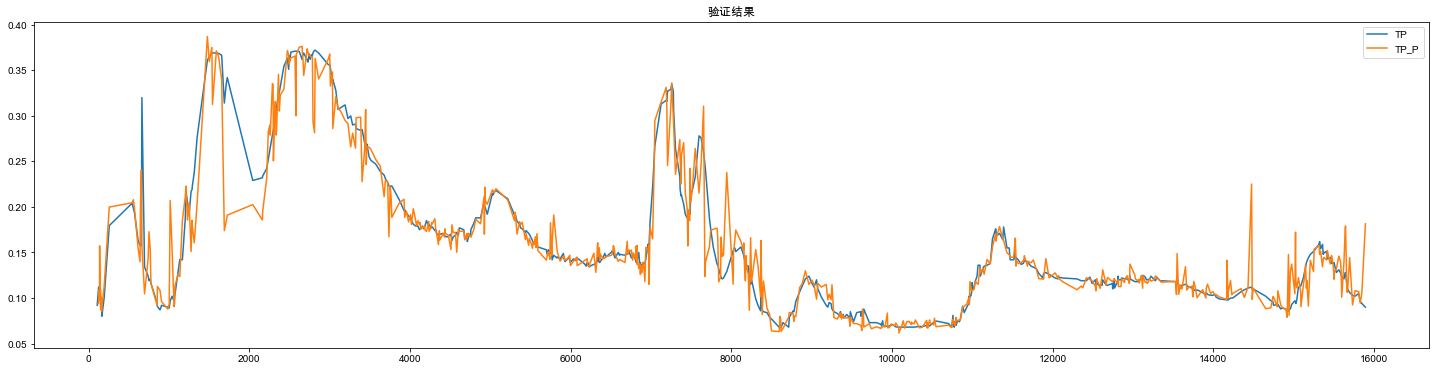

In [82]:
X_test.sort_index()[['TP', 'TP_P']].plot(figsize=(25, 6), title='È™åËØÅÁªìÊûú')

In [85]:
calc_err(X_test, 'TP', 0.1)

È™åËØÅÈõÜËØØÂ∑Æ 10% ÂÜÖÂáÜÁ°ÆÁéá‰∏∫: 0.765


Temp        pH        DO    Elecon  Turbidity        TP      TP_P  \
8787   1.232145 -0.984007 -0.141393 -1.828800  -0.362502  0.088000  0.080239   
6889  -0.831625  0.509468  0.624775  0.655727  -0.405241  0.137000  0.127851   
3457  -0.497779  0.394585  1.444398  1.503939  -0.447980  0.267000  0.246395   
4187  -0.953023  0.566909  0.366416  1.477224  -0.191546  0.179000  0.174721   
8164   0.685853  0.796675  0.776227 -0.626609  -0.405241  0.143000  0.136771   
...         ...       ...       ...       ...        ...       ...       ...   
8188   0.746552  0.796675  0.918770 -0.700076  -0.447980  0.136000  0.136450   
10469  1.353544 -1.098890 -1.624731 -0.860369  -0.490719  0.069333  0.076004   
8445   0.867951 -0.984007  0.027877 -1.401354  -0.234285  0.084000  0.088791   
5770  -1.256518  2.002943  1.408762  1.310253  -0.533458  0.142000  0.159651   
768    1.505291 -1.328656 -1.629186 -1.458124   5.307543  0.121000  0.152732   

       err_rate  
8787   0.088189  
6889   0.066781  
3457   0.077174  
4187   0.023903  
8164   0.043560  
...         ...  
8188   0.003306  
10469  0.096206  
8445   0.057032  
5770   0.124301  
768    0.262247  

[685 rows x 8 columns]

In [86]:
# Á°ÆÂÆöÂΩìÂâçtest_4hÁöÑÊï∞ÊçÆÊÉÖÂÜµ
test_4h.describe(percentiles=[.01,.02,.03,.85,.9,.95,.97,.99]).T

count        mean        std        min          1%          2%  \
Temp       467.0   19.946895   1.688578  16.800000   16.800000   16.900000   
pH         467.0    7.564882   0.067859   7.400000    7.446600    7.460000   
DO         467.0    6.510792   0.482931   5.430000    5.640000    5.666400   
Elecon     467.0  441.369593  22.319467   0.400000  421.566000  421.964000   
Turbidity  450.0   12.493333  18.526671   0.100000    0.400000    0.600000   
CODMn      462.0    1.263009   1.121229   0.100000    0.404400    0.520000   
NH3N       424.0    0.065969   0.083507   0.001000    0.004230    0.005460   
TP         464.0    0.127351   0.085270   0.048000    0.051000    0.052000   
TN         464.0    3.511918   0.209214   0.160000    3.276300    3.280000   
TP_P       467.0    0.152737   0.065717   0.048298    0.050975    0.052379   

                   3%         50%         85%         90%         95%  \
Temp        16.900000   20.300000   21.800000   22.000000   22.100000   
pH           7.470000    7.570000    7.630000    7.640000    7.650000   
DO           5.739600    6.390000    7.080000    7.342000    7.467000   
Elecon     422.596000  446.300000  449.700000  450.400000  451.240000   
Turbidity    0.847000    9.000000   19.330000   22.860000   30.140000   
CODMn        0.538300    1.070000    1.520000    1.600000    1.740000   
NH3N         0.008380    0.039000    0.109550    0.140000    0.168500   
TP           0.052000    0.091000    0.188650    0.255100    0.327100   
TN           3.290000    3.500000    3.680000    3.717000    3.770000   
TP_P         0.053896    0.131305    0.238972    0.260641    0.281336   

                  97%         99%         max  
Temp        22.200000   22.234000   22.600000  
pH           7.660200    7.710000    8.230000  
DO           7.520400    7.643600    8.600000  
Elecon     452.002000  452.834000  453.700000  
Turbidity   34.771000   83.731000  237.100000  
CODMn        2.409400   10.040000   10.060000  
NH3N         0.244620    0.457870    0.873000  
TP           0.340110    0.378590    0.876000  
TN           3.790000    3.820000    3.930000  
TP_P         0.291744    0.301699    0.326594

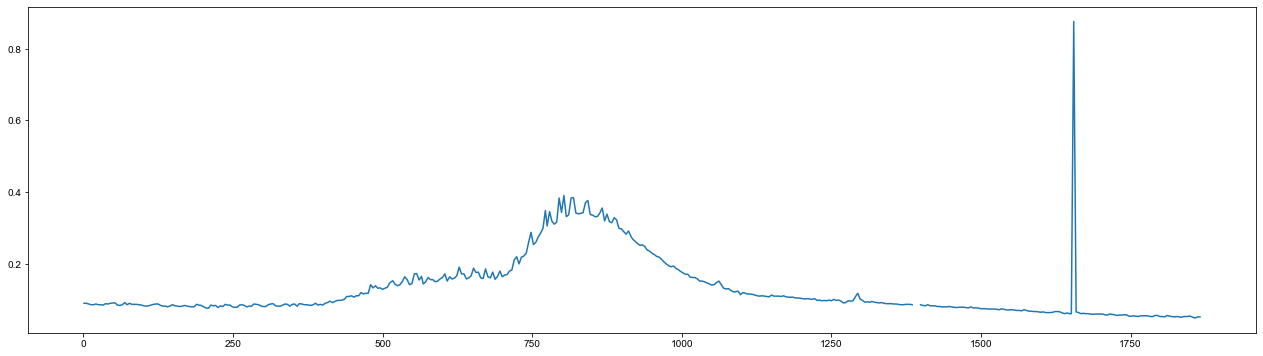

In [87]:
test_4h['TP'].plot(figsize=(22, 6))

In [ ]:
# TODO
data_filter = data_base[['Time', 'Temp', 'pH', 'DO', 'Elecon', 'Turbidity', 'CODMn', 'NH3N', 'TP', 'TN']]
for x in data_filter.columns[1:]:
    data_filter.loc[data_filter[x]<data_filter[x].quantile(.05), x] = np.nan
    data_filter.loc[data_filter[x]>data_filter[x].quantile(.95), x] = np.nan
data_filter = data_filter.interpolate(method='linear').fillna(method='bfill')

In [148]:
# È™åËØÅÈ¢ÑÊµãÊï∞ÊçÆËøõË°åÈ¢ÑÂ§ÑÁêÜÁªüËÆ°Á≠õÈÄâ
test_4h.loc[test_4h['TP']>=test_4h['TP'].quantile(.99), 'TP'] = np.nan
test_4h.loc[test_4h['pH']>=test_4h['pH'].quantile(.99), 'pH'] = np.nan
test_4h.loc[test_4h['DO']>=test_4h['DO'].quantile(.99), 'DO'] = np.nan
test_4h.loc[test_4h['Elecon']<test_4h['Elecon'].quantile(.01), 'Elecon'] = np.nan
test_4h.loc[test_4h['Elecon']<test_4h['Elecon'].quantile(.01), 'Elecon'] = np.nan
test_4h.loc[test_4h['NH3N']>test_4h['NH3N'].quantile(.97), 'NH3N'] = np.nan
test_4h.loc[test_4h['CODMn']>test_4h['CODMn'].quantile(.97), 'CODMn'] = np.nan
test_4h[['Temp','pH','DO','Elecon','Turbidity']].describe(percentiles=[.01,.02,.03,.05,.85,.9,.95,.97,.99]).T

count        mean        std     min        1%        2%        3%  \
Temp       467.0   19.946895   1.688578   16.80   16.8000   16.9000   16.9000   
pH         463.0    7.562311   0.058993    7.40    7.4462    7.4600    7.4700   
DO         462.0    6.495628   0.461436    5.43    5.6400    5.6644    5.7366   
Elecon     457.0  442.770460   8.392944  422.10  422.6560  422.8120  422.9680   
Turbidity  450.0   12.493333  18.526671    0.10    0.4000    0.6000    0.8470   

                 5%     50%       85%     90%       95%      97%       99%  \
Temp        17.0300   20.30   21.8000   22.00   22.1000   22.200   22.2340   
pH           7.4700    7.56    7.6300    7.64    7.6500    7.660    7.6800   
DO           5.9005    6.39    6.9985    7.31    7.4495    7.500    7.5639   
Elecon     423.3600  446.50  449.7000  450.40  451.3400  452.032  452.8440   
Turbidity    1.5450    9.00   19.3300   22.86   30.1400   34.771   83.7310   

              max  
Temp        22.60  
pH           7.71  
DO           7.63  
Elecon     453.70  
Turbidity  237.10

In [97]:
# ********************  Raw   ********************
# test_4h['TP_P'] = rf_tp.predict(
#     test_4h[
#         ['Temp','pH','DO','Elecon','Turbidity']
#     ].interpolate(method='linear').fillna(method='bfill')).reshape(-1, 1)
# ******************** ‰∫§ÂèâÁâπÂæÅ ********************
# test_4h['TP_P'] = lr_tp.predict(
#     poly.fit_transform(
#         test_4h[
#             ['Temp','pH','DO','Elecon','Turbidity']
#         ].interpolate(method='linear').fillna(method='bfill'))
# ).reshape(-1, 1)
#  ******************** MinMax ********************
# test_x_mm = MinMaxScaler().fit(test_4h[['Temp','pH','DO','Elecon','Turbidity']])
# test_y_mm = MinMaxScaler().fit(test_4h[['TP']])
# test_4h['TP_P'] = test_y_mm.inverse_transform(
#     gbrt_tp.predict(
#         test_x_mm.transform(
#             test_4h[
#                 ['Temp','pH','DO','Elecon','Turbidity']
#             ].interpolate(method='linear').fillna(method='bfill'))
# ).reshape(-1, 1))
# ******************** MinMAx + ‰∫§ÂèâÁâπÂæÅ ********************
# test_4h['TP_P'] = test_y_mm.inverse_transform(
#     rf_tp.predict(
#         poly.fit_transform(
#             test_x_mm.transform(
#                 test_4h[
#                     ['Temp','pH','DO','Elecon','Turbidity']
#                 ].interpolate(method='linear').fillna(method='bfill')))
# ).reshape(-1, 1))
# ********************  STD  ********************
test_x_std =  StandardScaler().fit(test_4h[['Temp','pH','DO','Elecon','Turbidity']])
test_y_std = StandardScaler().fit(test_4h[['TP']])
# test_4h['TP_P'] = test_y_std.inverse_transform(
#     rf_tp.predict(
#         test_x_std.transform(
#             test_4h[
#                 ['Temp','pH','DO','Elecon','Turbidity']
#             ].interpolate(method='linear').fillna(method='bfill'))
# ).reshape(-1, 1))
# ******************** STD + ‰∫§ÂèâÁâπÂæÅ ********************
test_4h['TP_P'] = stdscaler_y.inverse_transform(
    xgb_tp.predict(
        poly.fit_transform(
            test_x_std.transform(
                test_4h[
                    ['Temp','pH','DO','Elecon','Turbidity']
                ].interpolate(method='linear').fillna(method='bfill')))
).reshape(-1, 1))
# ********************  Result  ********************
test_4h

Time  Temp    pH    DO  Elecon  Turbidity  CODMn   NH3N  \
1    2020-05-26 00:00:00  16.8  7.68  7.67   449.7        0.9   1.12  0.027   
5    2020-05-26 04:00:00  16.8  7.64  7.56   450.7        4.7   1.08  0.016   
9    2020-05-26 08:00:00  16.8  7.64  7.56   449.5        7.4   1.08  0.017   
13   2020-05-26 12:00:00  16.9  7.71  7.73   448.9       10.5   0.92  0.023   
17   2020-05-26 16:00:00  16.9  7.71  7.80   448.8        3.4   0.88  0.012   
...                  ...   ...   ...   ...     ...        ...    ...    ...   
1850 2020-08-11 20:00:00  22.1  7.58  5.98   425.4        9.3   0.78  0.020   
1854 2020-08-12 00:00:00  22.1  7.60  5.93   426.4        6.5   0.59  0.023   
1858 2020-08-12 04:00:00  22.2  7.63  6.24   428.0        6.4   0.53  0.020   
1862 2020-08-12 08:00:00  22.1  7.63  6.29   429.0        6.4   0.96  0.020   
1866 2020-08-12 12:00:00  22.5  7.73  6.36   425.8        6.5   0.60  0.023   

         TP    TN      TP_P  
1     0.089  3.44  0.144536  
5     0.089  3.44  0.143637  
9     0.087  3.28  0.145073  
13    0.085  3.44  0.164501  
17    0.085  3.49  0.161452  
...     ...   ...       ...  
1850  0.053  3.32  0.107468  
1854  0.050  3.54  0.098265  
1858  0.048  3.42  0.097442  
1862  0.051  3.28  0.108940  
1866  0.051  3.27  0.106070  

[467 rows x 11 columns]

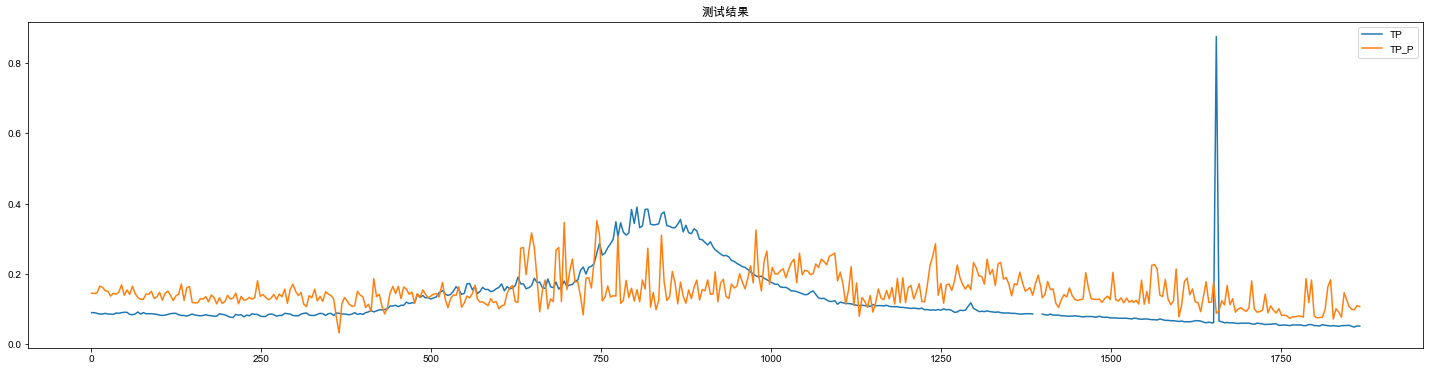

In [98]:
test_4h.sort_index()[['TP', 'TP_P']].plot(figsize=(25, 6), title='ÊµãËØïÁªìÊûú')

#### ÊïàÊûúËØÑ‰º∞

In [69]:
# ËÆ°ÁÆóÂ°´Ë°•ËØÜÂà´ÁöÑÂáÜÁ°ÆÁéá
# TN TP
def calc_err(X, index, rate: float): 
    """
    ËÆ°ÁÆóÈ™åËØÅÈõÜÈ¢ÑÊµãËØØÂ∑Æ
    """
    # X[index] = stdscaler_y.inverse_transform(X[index])
    # X['{}_P'.format(index)] = test_y_std.inverse_transform(X['{}_P'.format(index)])
    X['err_rate'] = abs(X[index]-X['{}_P'.format(index)]) / X[index]
    accuracy = X[X['err_rate']<rate].shape[0] / X.shape[0]
    print(u"È™åËØÅÈõÜËØØÂ∑Æ {}% ÂÜÖÂáÜÁ°ÆÁéá‰∏∫: {:.3f}".format(int(rate*100), accuracy))

    return X

In [99]:
res = calc_err(test_4h[['TP', 'TP_P']], 'TP', rate=0.3)

È™åËØÅÈõÜËØØÂ∑Æ 30% ÂÜÖÂáÜÁ°ÆÁéá‰∏∫: 0.236


In [74]:
res

TP      TP_P  err_rate
1     0.089  0.130758  0.469194
5     0.089  0.126394  0.420159
9     0.087  0.120234  0.381998
13    0.085  0.125963  0.481918
17    0.085  0.131565  0.547825
...     ...       ...       ...
1850  0.053  0.087774  0.656117
1854  0.050  0.054969  0.099383
1858  0.048  0.069109  0.439771
1862  0.051  0.077356  0.516781
1866  0.051  0.071382  0.399639

[467 rows x 3 columns]

In [75]:
res.describe(percentiles=np.arange(.1, .99, .1)).T

count      mean       std       min       10%       20%       30%  \
TP        464.0  0.127351  0.085270  0.048000  0.060000  0.075600  0.081900   
TP_P      467.0  0.152737  0.065717  0.048298  0.077268  0.103895  0.117333   
err_rate  464.0  0.413433  0.346392  0.000047  0.055670  0.128910  0.207143   

              40%       50%       60%       70%       80%       90%       max  
TP        0.08500  0.091000  0.107000  0.141000  0.164800  0.255100  0.876000  
TP_P      0.12201  0.131305  0.147128  0.173080  0.218873  0.260641  0.326594  
err_rate  0.30336  0.361456  0.408928  0.470331  0.579430  0.848381  2.191185

---

## Êï∞ÊçÆÂ°´Ë°•ËøáÁ®ã

In [160]:
data_dwj = data_dwj.replace(-999.0, 0.0)
data_dwj

Time  Temp    pH    DO  Elecon  Turbidity  CODMn   NH3N  \
1     2018-05-30 14:00:00  22.9  4.94  5.68     0.1        0.0   9.85  0.000   
2     2018-05-30 18:00:00  23.1  5.01  5.70     0.1        0.0   9.85  0.000   
3     2018-05-30 19:00:00  22.7  5.05  5.71   466.2        0.0   0.00  0.000   
4     2018-05-30 21:00:00  23.3  5.10  5.67     0.1        0.0   0.00  0.000   
5     2018-05-31 19:00:00  22.7  5.33  5.27     0.1        0.0   9.85  0.000   
...                   ...   ...   ...   ...     ...        ...    ...    ...   
15913 2020-05-26 11:00:00  16.9  7.67  7.71   449.0        3.2   0.00  0.000   
15914 2020-05-26 12:00:00  16.9  7.71  7.73   448.9       10.5   0.92  0.023   
15915 2020-05-26 13:00:00  16.9  7.69  7.75   447.9        8.1   0.00  0.000   
15916 2020-05-26 14:00:00  17.0  7.71  7.80   449.0        5.4   0.00  0.000   
15917 2020-05-26 15:00:00  17.0  7.71  7.86   449.0        3.7   0.00  0.000   

          TP    TN  
1      1.004  3.97  
2      1.004  3.97  
3      0.000  0.00  
4      0.000  0.00  
5      1.004  3.97  
...      ...   ...  
15913  0.000  0.00  
15914  0.085  3.44  
15915  0.000  0.00  
15916  0.000  0.00  
15917  0.000  0.00  

[15917 rows x 10 columns]

In [161]:
data_dwj.describe(percentiles=[.01, .02, .03, .95, .97, .98, .99]).T

count        mean        std  min     1%     2%       3%     50%  \
Temp       15917.0   18.284828   3.724114  0.0  13.30  13.60   13.700   17.80   
pH         15917.0    7.610013   0.604832  0.0   6.62   7.21    7.280    7.64   
DO         15917.0    7.453055   1.377682  0.0   4.74   5.01    5.240    7.54   
Elecon     15917.0  433.753239  67.842220  0.0   0.04   0.50  409.048  440.80   
Turbidity  15917.0    7.658559  47.100602  0.0   0.00   0.00    0.100    0.60   
CODMn      15917.0    0.290224   0.880140  0.0   0.00   0.00    0.000    0.00   
NH3N       15917.0    0.026642   0.267852  0.0   0.00   0.00    0.000    0.00   
TP         15917.0    0.045663   0.102253  0.0   0.00   0.00    0.000    0.00   
TN         15917.0    0.926907   1.885059  0.0   0.00   0.00    0.000    0.00   

               95%      97%        98%        99%       max  
Temp        23.320   23.600   23.80000   25.90000    30.500  
pH           8.020    8.070    8.13000    8.27000     9.450  
DO           9.530    9.640    9.70000    9.91000    10.360  
Elecon     466.900  467.900  468.60000  470.00000  1364.300  
Turbidity   23.000   44.404   84.60000  198.06800  1536.500  
CODMn        1.090    1.200    1.30000    1.78680    16.110  
NH3N         0.038    0.050    0.07100    0.26736     5.654  
TP           0.231    0.315    0.35868    0.39100     1.160  
TN           3.680    3.740    3.79000    3.89000    72.880

#### 1. ‰øÆË°•TP

In [162]:
missed_tp = data_dwj.loc[
    (data_dwj['TP']<=0) &
    (data_dwj['Temp']>=data_dwj['Temp'].quantile(.01)) &
    (data_dwj['pH']>=data_dwj['pH'].quantile(.01)) &
    (data_dwj['DO']>0) &
    (data_dwj['Elecon']>=data_dwj['Elecon'].quantile(.03)) & 
    (data_dwj['Elecon']<=data_dwj['Elecon'].quantile(.97)) &
    (data_dwj['Turbidity']>0) & (data_dwj['Turbidity']<=data_dwj['Turbidity'].quantile(.97))
]
tmp = data_dwj.append(missed_tp)
raw_tp = tmp.drop_duplicates(keep=False)
missed_tp.describe(percentiles=[.01, .02, .95, .97, .99])

Temp            pH            DO        Elecon     Turbidity  \
count  10772.000000  10772.000000  10772.000000  10772.000000  10772.000000   
mean      18.264668      7.659734      7.494227    443.339203      2.517989   
std        3.297609      0.198055      1.243560     14.946338      5.500408   
min       13.300000      6.850000      4.440000    409.100000      0.002000   
1%        13.700000      7.270000      5.270000    411.600000      0.100000   
2%        13.900000      7.340000      5.360000    414.400000      0.100000   
50%       17.500000      7.640000      7.520000    440.900000      0.600000   
95%       23.200000      8.010000      9.580000    466.100000     14.500000   
97%       23.400000      8.060000      9.660000    466.600000     20.100000   
99%       23.700000      8.260000     10.022900    467.400000     28.900000   
max       25.100000      9.450000     10.360000    467.900000     44.300000   

              CODMn          NH3N       TP            TN  
count  10772.000000  10772.000000  10772.0  10772.000000  
mean       0.002763      0.000577      0.0      0.002241  
std        0.158982      0.033866      0.0      0.088013  
min        0.000000      0.000000      0.0      0.000000  
1%         0.000000      0.000000      0.0      0.000000  
2%         0.000000      0.000000      0.0      0.000000  
50%        0.000000      0.000000      0.0      0.000000  
95%        0.000000      0.000000      0.0      0.000000  
97%        0.000000      0.000000      0.0      0.000000  
99%        0.000000      0.000000      0.0      0.000000  
max       12.600000      2.084000      0.0      3.640000

In [163]:
raw_tp.shape[0] + missed_tp.shape[0]

15917

In [165]:
data_dwj.shape[0]

15917

In [166]:
missed_tp['TP'] = rf_tp.predict(missed_tp[['Temp', 'pH', 'DO', 'Elecon', 'Turbidity']])
missed_tp

Time  Temp    pH    DO  Elecon  Turbidity  CODMn  NH3N  \
53    2018-06-09 17:00:00  20.1  7.26  8.40   450.0       34.6    0.0   0.0   
55    2018-06-09 20:00:00  19.9  7.35  8.38   450.2       34.0    0.0   0.0   
57    2018-06-09 23:00:00  19.9  7.43  8.39   447.9       32.1    0.0   0.0   
58    2018-06-10 01:00:00  19.9  7.48  8.39   449.1       37.1    0.0   0.0   
60    2018-06-10 04:00:00  20.0  7.52  8.36   449.3       33.4    0.0   0.0   
...                   ...   ...   ...   ...     ...        ...    ...   ...   
15912 2020-05-26 10:00:00  16.9  7.69  7.63   449.4        1.6    0.0   0.0   
15913 2020-05-26 11:00:00  16.9  7.67  7.71   449.0        3.2    0.0   0.0   
15915 2020-05-26 13:00:00  16.9  7.69  7.75   447.9        8.1    0.0   0.0   
15916 2020-05-26 14:00:00  17.0  7.71  7.80   449.0        5.4    0.0   0.0   
15917 2020-05-26 15:00:00  17.0  7.71  7.86   449.0        3.7    0.0   0.0   

             TP   TN  
53     0.207315  0.0  
55     0.208570  0.0  
57     0.201290  0.0  
58     0.202580  0.0  
60     0.187195  0.0  
...         ...  ...  
15912  0.142950  0.0  
15913  0.149440  0.0  
15915  0.170880  0.0  
15916  0.195730  0.0  
15917  0.197665  0.0  

[10772 rows x 10 columns]

In [167]:
new_tp = pd.concat([missed_tp, raw_tp]).sort_index()
new_tp.replace(0.0, np.nan).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15917 entries, 1 to 15917
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       15917 non-null  datetime64[ns]
 1   Temp       15834 non-null  float64       
 2   pH         15833 non-null  float64       
 3   DO         15834 non-null  float64       
 4   Elecon     15778 non-null  float64       
 5   Turbidity  15594 non-null  float64       
 6   CODMn      4059 non-null   float64       
 7   NH3N       3648 non-null   float64       
 8   TP         14864 non-null  float64       
 9   TN         4075 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.3 MB


In [168]:
new_tp

Time  Temp    pH    DO  Elecon  Turbidity  CODMn   NH3N  \
1     2018-05-30 14:00:00  22.9  4.94  5.68     0.1        0.0   9.85  0.000   
2     2018-05-30 18:00:00  23.1  5.01  5.70     0.1        0.0   9.85  0.000   
3     2018-05-30 19:00:00  22.7  5.05  5.71   466.2        0.0   0.00  0.000   
4     2018-05-30 21:00:00  23.3  5.10  5.67     0.1        0.0   0.00  0.000   
5     2018-05-31 19:00:00  22.7  5.33  5.27     0.1        0.0   9.85  0.000   
...                   ...   ...   ...   ...     ...        ...    ...    ...   
15913 2020-05-26 11:00:00  16.9  7.67  7.71   449.0        3.2   0.00  0.000   
15914 2020-05-26 12:00:00  16.9  7.71  7.73   448.9       10.5   0.92  0.023   
15915 2020-05-26 13:00:00  16.9  7.69  7.75   447.9        8.1   0.00  0.000   
15916 2020-05-26 14:00:00  17.0  7.71  7.80   449.0        5.4   0.00  0.000   
15917 2020-05-26 15:00:00  17.0  7.71  7.86   449.0        3.7   0.00  0.000   

             TP    TN  
1      1.004000  3.97  
2      1.004000  3.97  
3      0.000000  0.00  
4      0.000000  0.00  
5      1.004000  3.97  
...         ...   ...  
15913  0.149440  0.00  
15914  0.085000  3.44  
15915  0.170880  0.00  
15916  0.195730  0.00  
15917  0.197665  0.00  

[15917 rows x 10 columns]

#### 2. ‰øÆË°•TN

In [181]:
missed_tn = new_tp.loc[
    (new_tp['TN']<=0) &
    (new_tp['Temp']>=new_tp['Temp'].quantile(.01)) &
    (new_tp['pH']>=new_tp['pH'].quantile(.01)) &
    (new_tp['DO']>0) &
    (new_tp['Elecon']>=new_tp['Elecon'].quantile(.03)) & 
    (new_tp['Elecon']<=new_tp['Elecon'].quantile(.97)) &
    (new_tp['Turbidity']>0) & (new_tp['Turbidity']<=new_tp['Turbidity'].quantile(.97))
]
tmp = new_tp.append(missed_tn)
raw_tn = tmp.drop_duplicates(keep=False)
missed_tn.describe(percentiles=[.01, .02, .95, .97, .99]).T

count        mean        std        min          1%          2%  \
Temp       10772.0   18.262440   3.297199   13.30000   13.700000   13.900000   
pH         10772.0    7.659753   0.198002    6.85000    7.270000    7.340000   
DO         10772.0    7.494518   1.243260    4.44000    5.270000    5.360000   
Elecon     10772.0  443.340577  14.946191  409.10000  411.600000  414.400000   
Turbidity  10772.0    2.516318   5.500101    0.00200    0.100000    0.100000   
CODMn      10772.0    0.001354   0.099321    0.00000    0.000000    0.000000   
NH3N       10772.0    0.000612   0.034075    0.00000    0.000000    0.000000   
TP         10772.0    0.166902   0.089675    0.05961    0.064594    0.066701   
TN         10772.0    0.000000   0.000000    0.00000    0.000000    0.000000   

                50%         95%         97%        99%        max  
Temp        17.5000   23.200000   23.400000   23.70000   25.10000  
pH           7.6400    8.010000    8.060000    8.26000    9.45000  
DO           7.5200    9.580000    9.660000   10.02290   10.36000  
Elecon     440.9500  466.100000  466.600000  467.40000  467.90000  
Turbidity    0.6000   14.445000   20.087000   28.90000   44.30000  
CODMn        0.0000    0.000000    0.000000    0.00000   10.10000  
NH3N         0.0000    0.000000    0.000000    0.00000    2.08400  
TP           0.1447    0.367683    0.374669    0.49329    0.54736  
TN           0.0000    0.000000    0.000000    0.00000    0.00000

In [182]:
missed_tn['TN'] = rf_tn.predict(missed_tp[['Temp', 'pH', 'DO', 'Elecon', 'Turbidity']])
missed_tn

Time  Temp    pH    DO  Elecon  Turbidity  CODMn  NH3N  \
53    2018-06-09 17:00:00  20.1  7.26  8.40   450.0       34.6    0.0   0.0   
55    2018-06-09 20:00:00  19.9  7.35  8.38   450.2       34.0    0.0   0.0   
57    2018-06-09 23:00:00  19.9  7.43  8.39   447.9       32.1    0.0   0.0   
58    2018-06-10 01:00:00  19.9  7.48  8.39   449.1       37.1    0.0   0.0   
60    2018-06-10 04:00:00  20.0  7.52  8.36   449.3       33.4    0.0   0.0   
...                   ...   ...   ...   ...     ...        ...    ...   ...   
15912 2020-05-26 10:00:00  16.9  7.69  7.63   449.4        1.6    0.0   0.0   
15913 2020-05-26 11:00:00  16.9  7.67  7.71   449.0        3.2    0.0   0.0   
15915 2020-05-26 13:00:00  16.9  7.69  7.75   447.9        8.1    0.0   0.0   
15916 2020-05-26 14:00:00  17.0  7.71  7.80   449.0        5.4    0.0   0.0   
15917 2020-05-26 15:00:00  17.0  7.71  7.86   449.0        3.7    0.0   0.0   

             TP        TN  
53     0.207315  1.043300  
55     0.208570  1.041200  
57     0.201290  1.290529  
58     0.202580  1.057775  
60     0.187195  1.064375  
...         ...       ...  
15912  0.142950  0.949981  
15913  0.149440  0.964689  
15915  0.170880  1.194450  
15916  0.195730  0.988879  
15917  0.197665  0.976079  

[10772 rows x 10 columns]

In [183]:
new_tn = pd.concat([missed_tn, raw_tn]).sort_index()
new_tn.replace(0.0, np.nan).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15917 entries, 1 to 15917
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       15917 non-null  datetime64[ns]
 1   Temp       15834 non-null  float64       
 2   pH         15833 non-null  float64       
 3   DO         15834 non-null  float64       
 4   Elecon     15778 non-null  float64       
 5   Turbidity  15594 non-null  float64       
 6   CODMn      4059 non-null   float64       
 7   NH3N       3648 non-null   float64       
 8   TP         14864 non-null  float64       
 9   TN         14847 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.3 MB


#### 3. ‰øÆË°•NH3N

In [145]:
new_tn.describe(percentiles=[.01, .02, .03, .05, .9, .95, .97, .99]).T

count        mean        std  min     1%     2%       3%      5%  \
Temp       15917.0   18.284828   3.724114  0.0  13.30  13.60   13.700   13.90   
pH         15917.0    7.610013   0.604832  0.0   6.62   7.21    7.280    7.36   
DO         15917.0    7.453055   1.377682  0.0   4.74   5.01    5.240    5.41   
Elecon     15917.0  433.753239  67.842220  0.0   0.04   0.50  409.048  414.80   
Turbidity  15917.0    7.658559  47.100602  0.0   0.00   0.00    0.100    0.20   
CODMn      15917.0    0.290224   0.880140  0.0   0.00   0.00    0.000    0.00   
NH3N       15917.0    0.026642   0.267852  0.0   0.00   0.00    0.000    0.00   
TP         15917.0    0.159076   0.108177  0.0   0.00   0.00    0.000    0.00   
TN         15917.0    3.318542   1.364831  0.0   0.00   0.00    0.000    0.00   

                  50%         90%         95%       97%         99%       max  
Temp        17.800000   22.800000   23.320000   23.6000   25.900000    30.500  
pH           7.640000    7.940000    8.020000    8.0700    8.270000     9.450  
DO           7.540000    9.120000    9.530000    9.6400    9.910000    10.360  
Elecon     440.800000  465.500000  466.900000  467.9000  470.000000  1364.300  
Turbidity    0.600000    9.400000   23.000000   44.4040  198.068000  1536.500  
CODMn        0.000000    0.930000    1.090000    1.2000    1.786800    16.110  
NH3N         0.000000    0.025000    0.038000    0.0500    0.267360     5.654  
TP           0.138321    0.302463    0.368368    0.3840    0.510776     1.160  
TN           3.522025    3.708102    3.760961    3.7995    3.890000    72.880

In [184]:
missed_nh3n = new_tn.loc[
    (new_tn['NH3N']<=0) &
    (new_tn['Temp']>=new_tn['Temp'].quantile(.01)) &
    (new_tn['pH']>=new_tn['pH'].quantile(.01)) &
    (new_tn['DO']>0) &
    (new_tn['Elecon']>=new_tn['Elecon'].quantile(.03)) & 
    (new_tn['Elecon']<=new_tn['Elecon'].quantile(.99)) &
    (new_tn['Turbidity']>0) & (new_tn['Turbidity']<=new_tn['Turbidity'].quantile(.97))
]
tmp = new_tn.append(missed_nh3n)
raw_nh3n = tmp.drop_duplicates(keep=False)
missed_nh3n.describe(percentiles=[.01, .02, .95, .97, .99]).T

count        mean        std      min      1%      2%  \
Temp       11416.0   18.215452   3.329710   13.300   13.60   13.70   
pH         11416.0    7.660896   0.201018    6.850    7.27    7.32   
DO         11416.0    7.504431   1.247309    4.440    5.27    5.36   
Elecon     11416.0  443.918211  15.145974  409.100  411.60  414.60   
Turbidity  11416.0    2.609169   5.605563    0.002    0.10    0.10   
CODMn      11416.0    0.034022   0.272434    0.000    0.00    0.00   
NH3N       11416.0    0.000000   0.000000    0.000    0.00    0.00   
TP         11416.0    0.165293   0.093374    0.000    0.00    0.00   
TN         11416.0    0.958466   0.548740    0.000    0.00    0.00   

                  50%         95%         97%         99%      max  
Temp        17.400000   23.200000   23.400000   23.700000   25.100  
pH           7.640000    8.020000    8.060000    8.260000    9.450  
DO           7.530000    9.570000    9.650000    9.980000   10.360  
Elecon     441.400000  466.600000  467.500000  468.800000  470.000  
Turbidity    0.600000   14.900000   20.400000   29.000000   44.300  
CODMn        0.000000    0.000000    0.670000    0.920000   13.450  
NH3N         0.000000    0.000000    0.000000    0.000000    0.000  
TP           0.143605    0.367834    0.375099    0.491541    1.006  
TN           0.879082    1.278426    3.430000    3.620000    8.480

In [185]:
missed_nh3n['NH3N'] = rf_nh3n.predict(missed_nh3n[['Temp', 'pH', 'DO', 'Elecon', 'Turbidity']])
missed_nh3n

Time  Temp    pH    DO  Elecon  Turbidity  CODMn  \
52    2018-06-09 14:00:00  20.3  7.06  8.49   445.5       40.8   1.26   
53    2018-06-09 17:00:00  20.1  7.26  8.40   450.0       34.6   0.00   
55    2018-06-09 20:00:00  19.9  7.35  8.38   450.2       34.0   0.00   
57    2018-06-09 23:00:00  19.9  7.43  8.39   447.9       32.1   0.00   
58    2018-06-10 01:00:00  19.9  7.48  8.39   449.1       37.1   0.00   
...                   ...   ...   ...   ...     ...        ...    ...   
15912 2020-05-26 10:00:00  16.9  7.69  7.63   449.4        1.6   0.00   
15913 2020-05-26 11:00:00  16.9  7.67  7.71   449.0        3.2   0.00   
15915 2020-05-26 13:00:00  16.9  7.69  7.75   447.9        8.1   0.00   
15916 2020-05-26 14:00:00  17.0  7.71  7.80   449.0        5.4   0.00   
15917 2020-05-26 15:00:00  17.0  7.71  7.86   449.0        3.7   0.00   

           NH3N        TP        TN  
52     1.336137  0.094000  3.410000  
53     1.043300  0.207315  1.043300  
55     1.041200  0.208570  1.041200  
57     1.290529  0.201290  1.290529  
58     1.057775  0.202580  1.057775  
...         ...       ...       ...  
15912  0.949981  0.142950  0.949981  
15913  0.964689  0.149440  0.964689  
15915  1.194450  0.170880  1.194450  
15916  0.988879  0.195730  0.988879  
15917  0.976079  0.197665  0.976079  

[11416 rows x 10 columns]

In [186]:
new_nh3n = pd.concat([raw_nh3n, missed_nh3n]).sort_index()
new_nh3n.replace(0.0, np.nan).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15917 entries, 1 to 15917
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       15917 non-null  datetime64[ns]
 1   Temp       15834 non-null  float64       
 2   pH         15833 non-null  float64       
 3   DO         15834 non-null  float64       
 4   Elecon     15778 non-null  float64       
 5   Turbidity  15594 non-null  float64       
 6   CODMn      4059 non-null   float64       
 7   NH3N       15064 non-null  float64       
 8   TP         14864 non-null  float64       
 9   TN         14847 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.3 MB


#### 4. ‰øÆË°•CODMn

In [187]:
new_nh3n.describe(percentiles=[.01, .02, .03, .05, .9, .95, .97, .99]).T

count        mean        std  min     1%     2%       3%      5%  \
Temp       15917.0   18.284828   3.724114  0.0  13.30  13.60   13.700   13.90   
pH         15917.0    7.610013   0.604832  0.0   6.62   7.21    7.280    7.36   
DO         15917.0    7.453055   1.377682  0.0   4.74   5.01    5.240    5.41   
Elecon     15917.0  433.753239  67.842220  0.0   0.04   0.50  409.048  414.80   
Turbidity  15917.0    7.658559  47.100602  0.0   0.00   0.00    0.100    0.20   
CODMn      15917.0    0.290224   0.880140  0.0   0.00   0.00    0.000    0.00   
NH3N       15917.0    0.657513   0.466397  0.0   0.00   0.00    0.000    0.00   
TP         15917.0    0.158624   0.108058  0.0   0.00   0.00    0.000    0.00   
TN         15917.0    1.523449   1.624572  0.0   0.00   0.00    0.000    0.00   

                  50%         90%        95%         97%         99%       max  
Temp        17.800000   22.800000   23.32000   23.600000   25.900000    30.500  
pH           7.640000    7.940000    8.02000    8.070000    8.270000     9.450  
DO           7.540000    9.120000    9.53000    9.640000    9.910000    10.360  
Elecon     440.800000  465.500000  466.90000  467.900000  470.000000  1364.300  
Turbidity    0.600000    9.400000   23.00000   44.404000  198.068000  1536.500  
CODMn        0.000000    0.930000    1.09000    1.200000    1.786800    16.110  
NH3N         0.812022    1.064582    1.14954    1.195734    1.364454     5.654  
TP           0.137998    0.302776    0.36833    0.380654    0.506868     1.160  
TN           0.926050    3.580000    3.68000    3.740000    3.890000    72.880

In [188]:
missed_codmn = new_nh3n.loc[
    (new_nh3n['CODMn']<=0) &
    (new_nh3n['Temp']>=new_nh3n['Temp'].quantile(.01)) &
    (new_nh3n['pH']>=new_nh3n['pH'].quantile(.01)) &
    (new_nh3n['DO']>0) &
    (new_nh3n['Elecon']>=new_nh3n['Elecon'].quantile(.03)) & 
    (new_nh3n['Elecon']<=new_nh3n['Elecon'].quantile(.99)) &
    (new_nh3n['Turbidity']>0) & 
    (new_nh3n['Turbidity']<=new_nh3n['Turbidity'].quantile(.97))
]
tmp = new_nh3n.append(missed_codmn)
raw_codmn = tmp.drop_duplicates(keep=False)
missed_codmn.describe(percentiles=[.01, .02, .95, .97, .99]).T

count        mean        std      min          1%          2%  \
Temp       11057.0   18.161210   3.320751   13.300   13.600000   13.700000   
pH         11057.0    7.664347   0.198980    6.850    7.270000    7.340000   
DO         11057.0    7.520946   1.243994    4.440    5.280000    5.360000   
Elecon     11057.0  443.908248  15.225447  409.100  411.600000  414.500000   
Turbidity  11057.0    2.475660   5.447386    0.002    0.100000    0.100000   
CODMn      11057.0    0.000000   0.000000    0.000    0.000000    0.000000   
NH3N       11057.0    0.875932   0.186302    0.002    0.230382    0.387968   
TP         11057.0    0.163101   0.091902    0.000    0.000000    0.000000   
TN         11057.0    0.877689   0.454047    0.000    0.000000    0.000000   

                  50%         95%         97%         99%        max  
Temp        17.300000   23.200000   23.400000   23.700000   25.10000  
pH           7.650000    8.020000    8.060000    8.260000    9.45000  
DO           7.540000    9.580000    9.660000    9.998800   10.36000  
Elecon     441.500000  466.600000  467.500000  468.800000  470.00000  
Turbidity    0.600000   14.200000   19.900000   28.744000   44.30000  
CODMn        0.000000    0.000000    0.000000    0.000000    0.00000  
NH3N         0.873964    1.168738    1.207748    1.344143    2.08400  
TP           0.142875    0.367056    0.374275    0.492193    0.54736  
TN           0.874415    1.175001    1.220630    1.397296   29.58000

In [189]:
missed_codmn['CODMn'] = rf_codmn.predict(missed_codmn[['Temp', 'pH', 'DO', 'Elecon', 'Turbidity']])
missed_codmn

Time  Temp    pH    DO  Elecon  Turbidity     CODMn  \
53    2018-06-09 17:00:00  20.1  7.26  8.40   450.0       34.6  1.043300   
55    2018-06-09 20:00:00  19.9  7.35  8.38   450.2       34.0  1.041200   
57    2018-06-09 23:00:00  19.9  7.43  8.39   447.9       32.1  1.290529   
58    2018-06-10 01:00:00  19.9  7.48  8.39   449.1       37.1  1.057775   
60    2018-06-10 04:00:00  20.0  7.52  8.36   449.3       33.4  1.064375   
...                   ...   ...   ...   ...     ...        ...       ...   
15912 2020-05-26 10:00:00  16.9  7.69  7.63   449.4        1.6  0.949981   
15913 2020-05-26 11:00:00  16.9  7.67  7.71   449.0        3.2  0.964689   
15915 2020-05-26 13:00:00  16.9  7.69  7.75   447.9        8.1  1.194450   
15916 2020-05-26 14:00:00  17.0  7.71  7.80   449.0        5.4  0.988879   
15917 2020-05-26 15:00:00  17.0  7.71  7.86   449.0        3.7  0.976079   

           NH3N        TP        TN  
53     1.043300  0.207315  1.043300  
55     1.041200  0.208570  1.041200  
57     1.290529  0.201290  1.290529  
58     1.057775  0.202580  1.057775  
60     1.064375  0.187195  1.064375  
...         ...       ...       ...  
15912  0.949981  0.142950  0.949981  
15913  0.964689  0.149440  0.964689  
15915  1.194450  0.170880  1.194450  
15916  0.988879  0.195730  0.988879  
15917  0.976079  0.197665  0.976079  

[11057 rows x 10 columns]

In [190]:
new = pd.concat([raw_codmn, missed_codmn]).sort_index()
new.replace(0.0, np.nan).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15917 entries, 1 to 15917
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       15917 non-null  datetime64[ns]
 1   Temp       15834 non-null  float64       
 2   pH         15833 non-null  float64       
 3   DO         15834 non-null  float64       
 4   Elecon     15778 non-null  float64       
 5   Turbidity  15594 non-null  float64       
 6   CODMn      15116 non-null  float64       
 7   NH3N       15064 non-null  float64       
 8   TP         14864 non-null  float64       
 9   TN         14847 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.3 MB


In [195]:
new.describe(percentiles=[.01, .02, .95, .97, .99]).T

count        mean        std  min     1%     2%         50%  \
Temp       15917.0   18.284828   3.724114  0.0  13.30  13.60   17.800000   
pH         15917.0    7.610013   0.604832  0.0   6.62   7.21    7.640000   
DO         15917.0    7.453055   1.377682  0.0   4.74   5.01    7.540000   
Elecon     15917.0  433.753239  67.842220  0.0   0.04   0.50  440.800000   
Turbidity  15917.0    7.658559  47.100602  0.0   0.00   0.00    0.600000   
CODMn      15917.0    0.900777   0.778616  0.0   0.00   0.00    0.868052   
NH3N       15917.0    0.657513   0.466397  0.0   0.00   0.00    0.812022   
TP         15917.0    0.158624   0.108058  0.0   0.00   0.00    0.137998   
TN         15917.0    1.523449   1.624572  0.0   0.00   0.00    0.926050   

                 95%         97%         99%       max  
Temp        23.32000   23.600000   25.900000    30.500  
pH           8.02000    8.070000    8.270000     9.450  
DO           9.53000    9.640000    9.910000    10.360  
Elecon     466.90000  467.900000  470.000000  1364.300  
Turbidity   23.00000   44.404000  198.068000  1536.500  
CODMn        1.20866    1.290000    1.786800    16.110  
NH3N         1.14954    1.195734    1.364454     5.654  
TP           0.36833    0.380654    0.506868     1.160  
TN           3.68000    3.740000    3.890000    72.880

In [197]:
new_filter = new.loc[
    (new['Elecon']<=new['Elecon'].quantile(.99)) &
    (new['Turbidity']<=new['Turbidity'].quantile(.99))
]
new_filter.describe(percentiles=[.01, .02, .95, .97, .99]).T

count        mean        std  min       1%     2%         50%  \
Temp       15608.0   18.293971   3.713933  0.0  13.4000  13.60   17.800000   
pH         15608.0    7.608639   0.609827  0.0   6.6107   7.21    7.640000   
DO         15608.0    7.459118   1.360485  0.0   4.7600   5.20    7.540000   
Elecon     15608.0  433.551871  67.279837  0.0   0.0400   0.50  440.700000   
Turbidity  15608.0    4.250117  14.802474  0.0   0.0000   0.00    0.600000   
CODMn      15608.0    0.906856   0.733465  0.0   0.0000   0.00    0.870000   
NH3N       15608.0    0.667909   0.454725  0.0   0.0000   0.00    0.817155   
TP         15608.0    0.160302   0.105927  0.0   0.0000   0.00    0.138536   
TN         15608.0    1.539773   1.624348  0.0   0.0000   0.00    0.929276   

                  95%        97%         99%      max  
Temp        23.400000   23.60000   26.000000   30.500  
pH           8.020000    8.07000    8.270000    9.450  
DO           9.540000    9.64000    9.920000   10.360  
Elecon     466.500000  467.40000  468.700000  470.000  
Turbidity   19.900000   28.90000   84.600000  197.900  
CODMn        1.201973    1.28000    1.650000   16.110  
NH3N         1.150422    1.19629    1.363272    5.654  
TP           0.368575    0.38100    0.505502    1.160  
TN           3.680000    3.74000    3.880000   72.880

### ‰øÆË°•Êó∂Èó¥Â∫èÂàó

In [198]:
# ÊûÑÂª∫ÂÆåÊï¥Â∫èÂàóÊï∞ÊçÆ
data_1h_expand = pd.DataFrame(columns=new_filter.columns) 
data_1h_expand['Time'] = pd.date_range('2018-5-30 14', '2020-5-26 15', freq='1H')
data_1h_expand

Time Temp   pH   DO Elecon Turbidity CODMn NH3N   TP   TN
0     2018-05-30 14:00:00  NaN  NaN  NaN    NaN       NaN   NaN  NaN  NaN  NaN
1     2018-05-30 15:00:00  NaN  NaN  NaN    NaN       NaN   NaN  NaN  NaN  NaN
2     2018-05-30 16:00:00  NaN  NaN  NaN    NaN       NaN   NaN  NaN  NaN  NaN
3     2018-05-30 17:00:00  NaN  NaN  NaN    NaN       NaN   NaN  NaN  NaN  NaN
4     2018-05-30 18:00:00  NaN  NaN  NaN    NaN       NaN   NaN  NaN  NaN  NaN
...                   ...  ...  ...  ...    ...       ...   ...  ...  ...  ...
17445 2020-05-26 11:00:00  NaN  NaN  NaN    NaN       NaN   NaN  NaN  NaN  NaN
17446 2020-05-26 12:00:00  NaN  NaN  NaN    NaN       NaN   NaN  NaN  NaN  NaN
17447 2020-05-26 13:00:00  NaN  NaN  NaN    NaN       NaN   NaN  NaN  NaN  NaN
17448 2020-05-26 14:00:00  NaN  NaN  NaN    NaN       NaN   NaN  NaN  NaN  NaN
17449 2020-05-26 15:00:00  NaN  NaN  NaN    NaN       NaN   NaN  NaN  NaN  NaN

[17450 rows x 10 columns]

In [199]:
data_1h_full = data_1h_expand.merge(new_filter, how='outer').groupby('Time').max()
data_1h_full

Temp    pH    DO  Elecon  Turbidity     CODMn      NH3N  \
Time                                                                           
2018-05-30 14:00:00  22.9  4.94  5.68     0.1        0.0  9.850000  0.000000   
2018-05-30 15:00:00   NaN   NaN   NaN     NaN        NaN       NaN       NaN   
2018-05-30 16:00:00   NaN   NaN   NaN     NaN        NaN       NaN       NaN   
2018-05-30 17:00:00   NaN   NaN   NaN     NaN        NaN       NaN       NaN   
2018-05-30 18:00:00  23.1  5.01  5.70     0.1        0.0  9.850000  0.000000   
...                   ...   ...   ...     ...        ...       ...       ...   
2020-05-26 11:00:00  16.9  7.67  7.71   449.0        3.2  0.964689  0.964689   
2020-05-26 12:00:00  16.9  7.71  7.73   448.9       10.5  0.920000  0.023000   
2020-05-26 13:00:00  16.9  7.69  7.75   447.9        8.1  1.194450  1.194450   
2020-05-26 14:00:00  17.0  7.71  7.80   449.0        5.4  0.988879  0.988879   
2020-05-26 15:00:00  17.0  7.71  7.86   449.0        3.7  0.976079  0.976079   

                           TP        TN  
Time                                     
2018-05-30 14:00:00  1.004000  3.970000  
2018-05-30 15:00:00       NaN       NaN  
2018-05-30 16:00:00       NaN       NaN  
2018-05-30 17:00:00       NaN       NaN  
2018-05-30 18:00:00  1.004000  3.970000  
...                       ...       ...  
2020-05-26 11:00:00  0.149440  0.964689  
2020-05-26 12:00:00  0.085000  3.440000  
2020-05-26 13:00:00  0.170880  1.194450  
2020-05-26 14:00:00  0.195730  0.988879  
2020-05-26 15:00:00  0.197665  0.976079  

[17450 rows x 9 columns]

In [211]:
new_full = data_1h_full.interpolate(method='linear').fillna(method='bfill').reset_index('Time')
new_full

Time   Temp      pH     DO  Elecon  Turbidity     CODMn  \
0     2018-05-30 14:00:00  22.90  4.9400  5.680     0.1        0.0  9.850000   
1     2018-05-30 15:00:00  22.95  4.9575  5.685     0.1        0.0  9.850000   
2     2018-05-30 16:00:00  23.00  4.9750  5.690     0.1        0.0  9.850000   
3     2018-05-30 17:00:00  23.05  4.9925  5.695     0.1        0.0  9.850000   
4     2018-05-30 18:00:00  23.10  5.0100  5.700     0.1        0.0  9.850000   
...                   ...    ...     ...    ...     ...        ...       ...   
17445 2020-05-26 11:00:00  16.90  7.6700  7.710   449.0        3.2  0.964689   
17446 2020-05-26 12:00:00  16.90  7.7100  7.730   448.9       10.5  0.920000   
17447 2020-05-26 13:00:00  16.90  7.6900  7.750   447.9        8.1  1.194450   
17448 2020-05-26 14:00:00  17.00  7.7100  7.800   449.0        5.4  0.988879   
17449 2020-05-26 15:00:00  17.00  7.7100  7.860   449.0        3.7  0.976079   

           NH3N        TP        TN  
0      0.000000  1.004000  3.970000  
1      0.000000  1.004000  3.970000  
2      0.000000  1.004000  3.970000  
3      0.000000  1.004000  3.970000  
4      0.000000  1.004000  3.970000  
...         ...       ...       ...  
17445  0.964689  0.149440  0.964689  
17446  0.023000  0.085000  3.440000  
17447  1.194450  0.170880  1.194450  
17448  0.988879  0.195730  0.988879  
17449  0.976079  0.197665  0.976079  

[17450 rows x 10 columns]

In [212]:
new_4h = pd.concat([
    new_full[new_full['Time'].dt.hour==i] for i in [0,4,8,12,16,20]
]).sort_index()
new_4h

Time       Temp        pH        DO  Elecon  Turbidity  \
2     2018-05-30 16:00:00  23.000000  4.975000  5.690000    0.10        0.0   
6     2018-05-30 20:00:00  23.000000  5.075000  5.690000  233.15        0.0   
10    2018-05-31 00:00:00  23.218182  5.131364  5.615455    0.10        0.0   
14    2018-05-31 04:00:00  23.109091  5.173182  5.542727    0.10        0.0   
18    2018-05-31 08:00:00  23.000000  5.215000  5.470000    0.10        0.0   
...                   ...        ...       ...       ...     ...        ...   
17430 2020-05-25 20:00:00  16.800000  7.680000  7.770000  449.70        1.8   
17434 2020-05-26 00:00:00  16.800000  7.680000  7.670000  449.70        0.9   
17438 2020-05-26 04:00:00  16.800000  7.640000  7.560000  450.70        4.7   
17442 2020-05-26 08:00:00  16.800000  7.640000  7.560000  449.50        7.4   
17446 2020-05-26 12:00:00  16.900000  7.710000  7.730000  448.90       10.5   

          CODMn   NH3N        TP        TN  
2      9.850000  0.000  1.004000  3.970000  
6      0.000000  0.000  0.000000  0.000000  
10     1.343182  0.000  0.136909  0.541364  
14     3.134091  0.000  0.319455  1.263182  
18     4.925000  0.000  0.502000  1.985000  
...         ...    ...       ...       ...  
17430  0.900000  0.026  0.090000  3.350000  
17434  1.120000  0.027  0.089000  3.440000  
17438  1.080000  0.016  0.089000  3.440000  
17442  1.080000  0.017  0.087000  3.280000  
17446  0.920000  0.023  0.085000  3.440000  

[4362 rows x 10 columns]

In [213]:
"""
pd.date_range('2018-6-6 12', '2020-5-26 12', freq='4H')
"""
new_4h.loc[(new_4h['Time']>='2018-6-6 12')&(new_4h['Time']<='2020-5-26 12')]

Time   Temp     pH     DO  Elecon  Turbidity  CODMn  \
166   2018-06-06 12:00:00  19.60  5.730  4.810  449.20        0.0  0.000   
170   2018-06-06 16:00:00  10.05  2.865  2.455  225.20        0.0  0.645   
174   2018-06-06 20:00:00  19.60  5.730  4.960  449.80        0.0  0.000   
178   2018-06-07 00:00:00   9.85  2.895  2.505  225.05        0.0  0.695   
182   2018-06-07 04:00:00  19.60  5.800  5.030  450.30        0.0  0.000   
...                   ...    ...    ...    ...     ...        ...    ...   
17430 2020-05-25 20:00:00  16.80  7.680  7.770  449.70        1.8  0.900   
17434 2020-05-26 00:00:00  16.80  7.680  7.670  449.70        0.9  1.120   
17438 2020-05-26 04:00:00  16.80  7.640  7.560  450.70        4.7  1.080   
17442 2020-05-26 08:00:00  16.80  7.640  7.560  449.50        7.4  1.080   
17446 2020-05-26 12:00:00  16.90  7.710  7.730  448.90       10.5  0.920   

        NH3N      TP     TN  
166    0.000  0.0000  0.000  
170    0.641  0.0490  1.695  
174    0.000  0.0000  0.000  
178    0.641  0.0465  1.630  
182    0.000  0.0000  0.000  
...      ...     ...    ...  
17430  0.026  0.0900  3.350  
17434  0.027  0.0890  3.440  
17438  0.016  0.0890  3.440  
17442  0.017  0.0870  3.280  
17446  0.023  0.0850  3.440  

[4321 rows x 10 columns]

In [214]:
save(new_4h.loc[(new_4h['Time']>='2018-6-6 12')&(new_4h['Time']<='2020-5-26 12')],
    'Â§ß‰πåÊ±ü4Â∞èÊó∂Êï∞ÊçÆ_from1hÈááÊ†∑.xls')

#### 5. ‰øÆÂ§çÂêéÊï∞ÊçÆÂàÜÊûê

In [164]:
new.replace(0.0, np.nan, inplace=True)
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15917 entries, 1 to 15917
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       15917 non-null  datetime64[ns]
 1   Temp       15834 non-null  float64       
 2   pH         15833 non-null  float64       
 3   DO         15834 non-null  float64       
 4   Elecon     15778 non-null  float64       
 5   Turbidity  15594 non-null  float64       
 6   CODMn      15116 non-null  float64       
 7   NH3N       15064 non-null  float64       
 8   TP         14864 non-null  float64       
 9   TN         14847 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 2.0 MB


In [165]:
new.sample(5)

Time  Temp    pH    DO  Elecon  Turbidity     CODMn  \
9745  2019-09-09 10:00:00  22.7  7.61  5.80   435.8        0.5  0.895036   
10502 2019-10-11 05:00:00  22.5  7.52  5.57   431.3        0.1  0.954416   
6562  2019-04-24 13:00:00  14.4  8.03  9.71   451.9        0.3  1.395193   
14470 2020-03-27 01:00:00  14.7  7.43  8.25   436.0        0.6  0.834471   
13970 2020-03-06 03:00:00  14.4  7.52  7.41   446.9        0.4  0.473900   

           NH3N        TP        TN  
9745   0.025018  0.073395  3.486141  
10502  0.022546  0.069765  3.523857  
6562   0.018102  0.150515  3.596620  
14470  0.020637  0.109384  3.582150  
13970  0.022582  0.104195  3.488750

- ÁõëÊµãÊó∂Èó¥ ------ Time
- Ê∞¥Ê∏©(‚ÑÉ) ------ Temp ------ W01010
- pH(Êó†ÈáèÁ∫≤) ------ pH ------ W01001
- Ê∫∂Ëß£Ê∞ß(mg/L) ------ DO ------ W01009
- ÁîµÂØºÁéá(ŒºS/cm) ------ Elecon ------ W01014
- ÊµäÂ∫¶(NTU) ------ Turbidity ------ W01003
- È´òÈî∞ÈÖ∏ÁõêÊåáÊï∞(mg/L) ------ CODMn ------ W01019
- Ê∞®Ê∞Æ(mg/L) ------ NH3N ------ W21003
- ÊÄªÁ£∑(mg/L) ------ TP ------ W21011
- ÊÄªÊ∞Æ(mg/L) ------ TN ------ W21001

In [177]:
new.groupby([new['Time'].dt.year, new['Time'].dt.month]).count().T

Time      2018                                    2019                      \
Time        5    6    7    8    9    10   11   12   1    2    3    4    5    
Time         5  167  187  696  711  688  658  726  744  671  744  719  707   
Temp         5  132  180  693  707  688  624  726  744  671  744  719  707   
pH           5  132  180  693  707  688  624  726  744  671  744  719  707   
DO           5  132  180  693  707  688  624  726  744  671  744  719  707   
Elecon       5  132  180  640  704  688  624  726  744  671  744  719  707   
Turbidity    0   98   40  677  706  688  624  726  744  670  744  701  706   
CODMn        3  108  117  442  629  659  629  720  744  566  740  701  706   
NH3N         0  101  112  429  628  654  629  718  744  549  740  701  706   
TP           3  108  113  440  626  659  617  719  733  385  702  700  706   
TN           3  108  117  414  626  659  625  719  733  385  702  700  706   

Time                                         2020                      
Time        6    7    8    9    10   11   12   1    2    3    4    5   
Time       712  696  714  714  708  720  740  741  687  733  715  614  
Temp       712  696  714  714  708  720  740  741  687  733  715  614  
pH         712  695  714  714  708  720  740  741  687  733  715  614  
DO         712  696  714  714  708  720  740  741  687  733  715  614  
Elecon     712  696  714  714  708  720  740  741  687  733  715  614  
Turbidity  712  695  711  708  705  718  737  741  687  733  712  611  
CODMn      707  621  689  709  703  718  734  740  678  732  712  609  
NH3N       707  621  688  709  703  718  734  740  680  732  712  609  
TP         707  621  688  709  703  718  734  740  680  732  712  609  
TN         707  621  688  708  703  718  734  740  678  732  712  609

#### Êï∞ÊçÆËØªÂèñ„ÄÅÂâçÂ§ÑÁêÜ

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 1 to 1866
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       467 non-null    datetime64[ns]
 1   Temp       467 non-null    float64       
 2   pH         467 non-null    float64       
 3   DO         467 non-null    float64       
 4   Elecon     467 non-null    float64       
 5   Turbidity  450 non-null    float64       
 6   CODMn      462 non-null    float64       
 7   NH3N       424 non-null    float64       
 8   TP         464 non-null    float64       
 9   TN         464 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 40.1 KB
